# Python en el análisis de datos astronómicos 
- Herrera Monteza Jherson Miguel
- Universidad Nacional de Trujillo

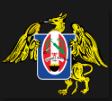

Link: https://www.coursera.org/learn/data-driven-astronomy

Curso de Coursera: "Data-Driven Astronomy"

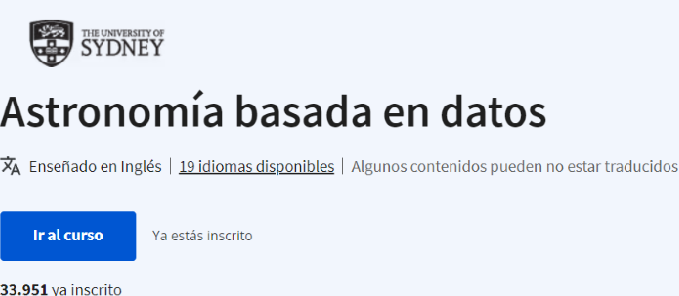

## Aplicaciones y preparación

1. Uso práctico de Python en la manipulación y análisis de datos astronómicos.
2.  Importante en la visualización de datos para interpretar resultados complejos.
3. Esencial para interpretar datos astronómicos complejos.

### Aspectos básicos

Importamos las librerías

In [1]:
from statistics import mean

Comencemos con un programa para calcular la media de un conjunto de números almacenados en una lista de Python.

In [3]:
fluxes = [23.3, 42.1, 2.0, -3.2, 55.6]
m = mean(fluxes)

Función que calcula la media de una lista de números. Toma un solo argumento, la lista de números flotantes, y devolver la media de esa lista

In [6]:
def calculate_mean(k):
    return sum(k)/len(k)

Las listas de Python son muy flexibles, pero son lentas para cálculos grandes.

Los arrays de NumPy pueden almacenar datos puramente numéricos en mucho menos espacio, y son mucho más simples y rápidos para los cálculos. Podemos calcular la media con un array de NumPy en lugar de una lista:

### Numpy para cálculos rápidos

In [1]:
import numpy as np
fluxes = np.array([23.3, 42.1, 2.0, -3.2, 55.6])
m = np.mean(fluxes)
m

23.96

Puede que esto no parezca más sencillo todavía, pero lo será en el futuro.

NumPy tiene una gran variedad de funciones numéricas. Por ejemplo, para calcular el tamaño de una matriz y la desviación estándar:

In [9]:
print(np.size(fluxes))
print(np.std(fluxes))

5
22.585358088814974


### Archivos CSV
Puede utilizar las funciones de cadena integradas de Python para leer un archivo CSV en una lista y procesarlo.

El programa recorre cada línea del archivo, dividiendo la fila en una lista de valores y agregando cada fila a los datos:

In [10]:
data = []
for line in open('data.csv'):
    data.append(line.strip().split(','))

print(data)

[['8.84', '17.22', '13.22', '3.84'], ['3.99', '11.73', '19.66', '1.27'], ['16.14', '18.72', '7.43', '11.09']]


El método de eliminación (strip) elimina los espacios en blanco (incluido el salto de línea) de los extremos de la línea. El método de división (split) crea una lista de cadenas utilizando el carácter ',' como separador entre elementos.

Ahora que podemos almacenar los datos en listas, necesitamos convertir cada elemento de una cadena a un flotante. Podríamos hacer esto usando bucles for anidados:

In [2]:
data = []
for line in open('data.csv'):
    row = []
    for col in line.strip().split(','):
        row.append(float(col))
    data.append(row)
print(data)

[[8.84, 17.22, 13.22, 3.84], [3.99, 11.73, 19.66, 1.27], [16.14, 18.72, 7.43, 11.09]]


NumPy tiene una función asarray más simple para realizar esta conversión:

In [3]:
data = []
for line in open('data.csv'):
    data.append(line.strip().split(','))
    
data = np.asarray(data, float)
data

array([[ 8.84, 17.22, 13.22,  3.84],
       [ 3.99, 11.73, 19.66,  1.27],
       [16.14, 18.72,  7.43, 11.09]])

La mayoría de las funciones de NumPy operan en toda la matriz a la vez en lugar de en elementos individuales.

### Leer una matriz NumPy desde CSV

La función NumPy loadtxt puede leer automáticamente un archivo CSV en una matriz NumPy, incluida la conversión de cadenas a números.

Usando nuestro archivo de ejemplo de la diapositiva anterior:

In [14]:
data = np.loadtxt('data.csv', delimiter = ',')
data

array([[ 8.84, 17.22, 13.22,  3.84],
       [ 3.99, 11.73, 19.66,  1.27],
       [16.14, 18.72,  7.43, 11.09]])

La función NumPy loadtxt es más simple, rápida y menos propensa a errores que la solución anterior.

Función calc_stats que lea datos de un archivo CSV y calcule su media y mediana. Toma el nombre del archivo como argumento y devuelve la media y la mediana en una tupla, redondeadas a un decimal:

In [4]:
def calc_stats(file_name):
    data = np.loadtxt(file_name, delimiter = ',')
    mean = round(np.mean(data), 1)
    median = round(np.median(data),1)
    return mean, median

In [5]:
print(calc_stats('data.csv'))
print(calc_stats('data2.csv'))
print(calc_stats('data3.csv'))

(11.1, 11.4)
(11.4, 10.4)
(11.6, 12.5)


### Matrices NumPy: operaciones por elementos
A diferencia de las listas de Python, las matrices NumPy admiten operaciones numéricas en matrices completas, ya sea como operaciones matriciales o por elementos.

A continuación se muestran algunos ejemplos:

In [20]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Element-wise multiplication 
print(a*2)

# Element-wise summation 
print(a + b)

# Element-wise product 
print(a*b)

[2 4 6]
[5 7 9]
[ 4 10 18]


NumPy proporciona muchas funciones para cálculos de elementos.
#### Operaciones de matriz NumPy

Podemos acceder a elementos de una matriz con notación de índice, como una lista. Las funciones que funcionan en listas también funcionan en matrices 1D NumPy.

Se puede acceder a filas o columnas mediante corte, como se muestra a continuación:

In [21]:
a = np.array([[1,2,3], [4,5,6]])  # 2x3 array

# Print first row of a:
print(a[0,:])

# Print second column of a:
print(a[:,1])

[1 2 3]
[2 5]


Función mean_datasets que lee una lista de archivos CSV y devuelve una matriz de la media de cada celda en los archivos de datos.

Cada uno de los archivos contiene n filas y m columnas, lo que da un total de n x m celdas. Las celdas individuales están separadas por comas y todos los archivos CSV de la lista tendrán la misma cantidad de filas y columnas.

El resultado debe tener las mismas dimensiones que los archivos de entrada. El resultado debería ser una matriz NumPy con entradas individuales redondeadas a un decimal.

Supongamos que queremos utilizar los tres archivos data1.csv, data2.csv y data3.csv.

In [24]:
def mean_datasets(Files):
    first_data = np.loadtxt(Files[0], delimiter = ',')
    n, m = first_data.shape
    
    sum_data = np.zeros((n,m))
    
    for file in Files:
        data = np.loadtxt(file, delimiter = ',')
        sum_data += data
    mean_data = round(sum_data/len(Files), 1)
    return mean_data

## Trabajar con archivos FITS
Uno de los formatos más utilizados para imágenes astronómicas es el Sistema Flexible de Transporte de Imágenes. En un archivo FITS, la imagen se almacena en una matriz numérica, que podemos cargar en una matriz NumPy.
Los archivos FITS también tienen encabezados que almacenan metadatos sobre la imagen.

Los archivos FITS son un formato estándar y los astrónomos han desarrollado muchas bibliotecas (en muchos lenguajes de programación) que pueden leer y escribir archivos FITS. Usaremos el módulo Astropy.

El siguiente código muestra cómo podemos abrir un archivo FITS e imprimir la información de su encabezado:

In [7]:
from astropy.io import fits
hdulist = fits.open('image0.fits')
hdulist.info()

Filename: image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


### Lectura en archivos FITS
Al abrir un archivo FITS en Astropy se devuelve una lista HDU (encabezado/unidad de datos). Cada HDU almacena encabezados y (opcionalmente) datos de imágenes.

El encabezado contiene metadatos sobre el objeto HDU, p. sus dimensiones y tipo de datos. Cada HDU puede contener datos de imágenes. La primera HDU se denomina HDU primaria.

Si queremos acceder a HDU individuales, podemos indexar el objeto de lista de HDU devuelto por fit.open. Se puede acceder a los datos de la imagen utilizando el atributo de datos:

In [8]:
data = hdulist[0].data
print(data.shape)

(200, 200)


Los datos de la imagen se almacenan convenientemente en una matriz NumPy, por lo que podemos operar con ellos directamente. Este ejemplo imprime las dimensiones de la imagen en la HDU primaria.

### Visualización de imágenes FITS
A menudo se desea visualizar los datos de imagen almacenados en archivos FITS. Podemos hacer esto usando la biblioteca matplotlib.

Este ejemplo crea un trazado 2D a partir de la imagen FITS anterior:

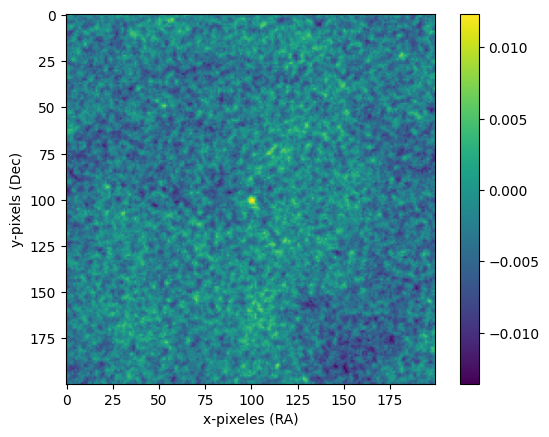

In [9]:
from matplotlib import pyplot as plt
hdulist = fits.open('image0.fits') # fits.open() abre archivo en formato FITS en modo lectura.image0.fits contiene una imagen en formato FITS.
data = hdulist[0].data # data almacena los datos de la imagen. Los datos de la imagen son una matriz 2D.
# Plot the 2D array
plt.imshow(data, cmap = plt.cm.viridis)  # cmap especifica el mapa de colores
plt.colorbar()
plt.xlabel('x-pixeles (RA)')
plt.ylabel('y-pixels (Dec)')
plt.show()

Text(0, 0.5, 'y-pixels (Dec)')

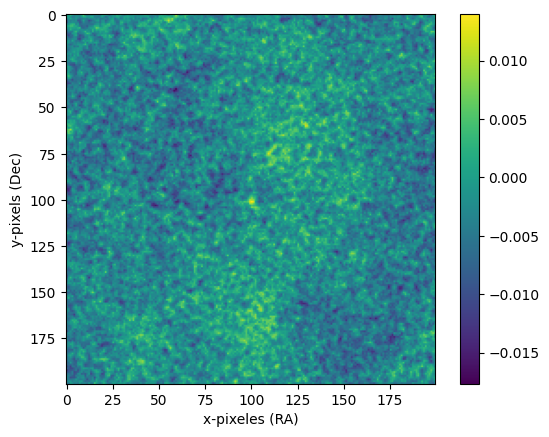

In [10]:
hdulist = fits.open('image1.fits')
data1 = hdulist[0].data
# Plot the 2D array
plt.imshow(data1, cmap = plt.cm.viridis)
plt.colorbar()
plt.xlabel('x-pixeles (RA)')
plt.ylabel('y-pixels (Dec)')

Función que cargue en un archivo FITS y encuentre la posición del píxel más brillante (es decir, el valor máximo) en sus datos de imagen. Para que esta función funcione con archivos arbitrarios, se pasa el nombre del archivo FITS como argumento a la función.

debería funcionar así: 
>>> load_fits('image0.fits')

(100, 100)

El píxel más brillante de esta imagen está exactamente en el centro de la matriz, como puedes comprobar visualmente al trazarlo:

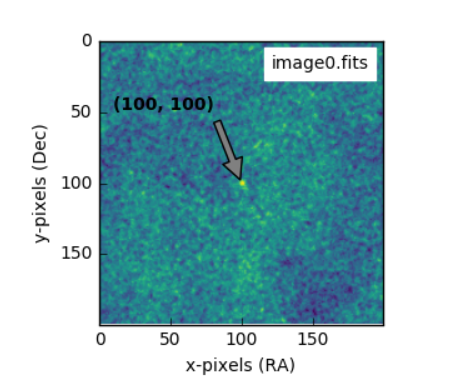

Para el archivo image1.fits, el máximo se desplaza 1 píxel hacia la izquierda y su función debería producir el siguiente resultado:

>>> load_fits('image1.fits')

(101, 100)

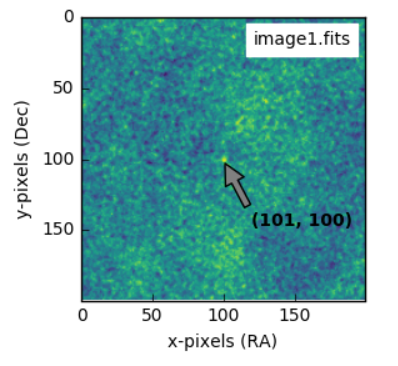

Todos los archivos FITS de este ejemplo contienen datos de imágenes del mismo púlsar, pero eso no significa necesariamente que sea visible en todas estas imágenes. Cuando se echa un vistazo al archivo image2.fits, por ejemplo, la función debería poder decirte que el píxel más brillante está en algún lugar completamente diferente:

>>> load_fits('image2.fits')

(14, 125)

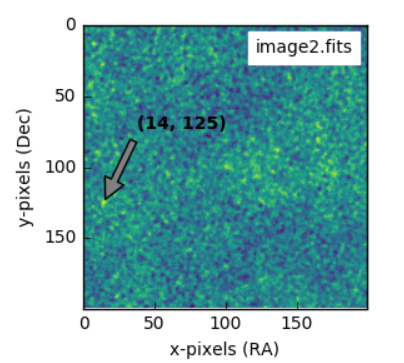

In [14]:
import numpy as np
def load_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[0].data
    max = np.unravel_index(np.argmax(data), data.shape)
    return max

In [16]:
load_fits('image2.fits')

(14, 125)

Se ha cubierto técnicas básicas de lectura de archivos y manipulación de datos. se aprendió cómo cargar datos y almacenarlos en listas de Python o matrices NumPy, y cómo realizar operaciones básicas en ambos tipos de datos.

Los ejemplos contenían cálculos de la media de conjuntos de datos unidimensionales y bidimensionales de diversas formas.

Pasamos a los archivos FITS y a cómo cargar archivos FITS, visualizar los datos de la imagen y extraer información específica de la imagen.

- Ahora juntaremos todo y redondearemos este módulo calculando la media de una pila de archivos FITS. Cada archivo individual puede tener o no un púlsar detectado, pero en la pila final debería poder ver una detección clara.

### Importancia de la pila media

La pila media de un conjunto de imágenes astronómicas es una imagen que se obtiene sumando las imágenes individuales del conjunto. Esto se hace para reducir el ruido en las imágenes y mejorar la sensibilidad.

El ruido es una de las principales limitaciones en la observación astronómica. Se debe a una variedad de factores, como la turbulencia atmosférica, el ruido del detector y el ruido de lectura. El ruido puede hacer que sea difícil ver objetos débiles o detalles finos en las imágenes.

Al sumar las imágenes individuales, se reduce el ruido estadístico. Esto se debe a que el ruido aleatorio se cancela en la suma.

La sensibilidad es la capacidad de una imagen para detectar objetos débiles. La sensibilidad se mejora al sumar las imágenes individuales porque se aumenta la cantidad de luz que se recoge.

La pila media se utiliza en una variedad de aplicaciones astronómicas, incluyendo:

* **Fotografía astronómica:** La pila media se utiliza para mejorar las imágenes de objetos astronómicos, como estrellas, galaxias y nebulosas.
* **Astrometría:** La pila media se utiliza para determinar las posiciones y movimientos de objetos astronómicos.
* **Astrofísica:** La pila media se utiliza para estudiar la estructura y evolución de objetos astronómicos.

Por ejemplo, la pila media se utiliza para crear imágenes de galaxias distantes. Estas galaxias son tan débiles que no se pueden ver en una sola imagen. Sin embargo, al sumar las imágenes de muchas exposiciones, se puede crear una imagen que sea lo suficientemente brillante como para ver detalles finos.

La pila media también se utiliza para estudiar la dinámica de las estrellas. Al comparar las imágenes de una estrella en diferentes momentos, se puede determinar cómo se mueve la estrella.

La pila media es una herramienta importante en la astronomía. Se utiliza para mejorar la sensibilidad y la calidad de las imágenes astronómicas.

### Ejemplos de funciones que operan con archivos FITS
Se muestra una función mean_fits que toma una lista de archivos FITS como argumento, los lee y devuelva los datos de imagen medios de los archivos FITS. Todas las imágenes tienen las mismas dimensiones y la matriz media calculada debe coincidir con esas dimensiones.

La función debería poder procesar una cantidad arbitraria de archivos.

La pila media de estos archivos será una matriz grande de 200 x 200, por lo que solo veremos el valor central de la matriz devuelta, que es donde esperamos que esté el púlsar.


In [11]:
def mean_fits(Files):
    n = len(Files)
    if n>0:
        hdulist = fits.open(Files[0])
        suma = hdulist[0].data
        hdulist.close()
        for i in range (1,n):
            hdulist = fits.open(Files[i])
            suma += hdulist[0].data
            hdulist.close()
    mean = suma/n
    return mean

In [13]:
mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])

array([[-0.00036388,  0.00391973,  0.00606907, ..., -0.00720786,
        -0.00212332, -0.00228317],
       [ 0.00497355,  0.00694207,  0.00274892, ..., -0.00627087,
        -0.00713888, -0.00408914],
       [-0.00304184, -0.00078282,  0.00081956, ..., -0.00148948,
        -0.00892732, -0.00665605],
       ...,
       [-0.01112028, -0.0148803 , -0.00862509, ..., -0.0019587 ,
        -0.00530199, -0.00447838],
       [-0.00926248, -0.0093529 , -0.00722779, ..., -0.0063015 ,
        -0.00334843, -0.00406074],
       [-0.01247407, -0.01190548, -0.00772194, ..., -0.00963094,
        -0.00797865, -0.00251972]])

Para los archivos image0.fits, image1.fits e image2.fits, la función devuelve:

In [14]:
mean_fits(['image0.fits', 'image1.fits', 'image2.fits'])[100, 100]

0.017356586332122486

Podemos acceder a la media en x=100, y=100 usando el operador de índice justo después de la llamada a la función, ya que esperamos que su valor de retorno sea una matriz. El valor medio central para los archivos image0.fits, image1.fits e image3.fits debe ser:

In [15]:
mean_fits(['image0.fits', 'image1.fits', 'image3.fits'])[100, 100]

0.01006323037048181

In [16]:
mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])[100, 100]

0.014150320738554

## La mediana
#### ¿Por qué usar la mediana?
Se aprendió sobre la manipulación básica de datos de Python y un formato de datos astronómico común: los archivos FITS. Se usó esto para calcular la pila media de un conjunto de imágenes astronómicas.

La mediana en muchos casos se considera una mejor medida que la media debido a su solidez ante los valores atípicos.

Sin embargo, una implementación ingenua del algoritmo de la mediana puede resultar muy ineficiente cuando se trata de grandes conjuntos de datos. Por suerte, los informáticos han dedicado mucho tiempo a pensar en este problema y han encontrado algunas buenas soluciones.

Existen diferentes estrategias para calcular la mediana. También es importante pensar en cuánto tiempo de CPU y memoria requieren los diferentes algoritmos.

La mediana puede ser una medida más sólida de la tendencia promedio de los conjuntos de datos que la media, ya que esta última se ve fácilmente sesgada por valores atípicos.

Digamos que tienes algunos flujos medidos y calculas su media:

In [17]:
from statistics import mean
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
m = mean(fluxes)
print(m)

29.32


Al observar los datos originales, la mayoría de los números están bastante cerca de 20, por lo que la media no parece muy representativa. De hecho, si intentas eliminar el valor atípico, 70,1, la media es 19,125.

La mediana se define simplemente como la mitad del conjunto de datos ordenados. Dado que sólo importa el orden de los puntos de datos, no su valor, los valores atípicos tienen un efecto mucho menor.

In [27]:
from statistics import median
m = median(fluxes)
m

20.7

Esto se acerca mucho más a nuestra sensación intuitiva del centro del decorado.

#### Calcular la mediana
Para calcular la mediana de una lista sin utilizar el módulo de estadísticas, es necesario ordenar los datos y tomar el valor central:

In [18]:
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7]
fluxes.sort()
mid = len(fluxes)//2
fluxes[mid]

20.7

Esto sólo funciona si tienes un número impar de elementos. Si hay un número par de elementos, hay dos en el medio, por lo que hay que encontrar ambos y tomar su promedio:

In [19]:
fluxes = [17.3, 70.1, 22.3, 16.2, 20.7, 19.3]
fluxes.sort()
mid = len(fluxes)//2
median = ( fluxes[mid-1]+fluxes[mid] )/2
median

20.0

Función llamada list_stats que toma una lista de números y devuelve una tupla de la mediana y la media de la lista (en este orden).

In [20]:
def list_stats(numbers):
    numbers.sort()
    if len(numbers)%2 == 0:
        mid = len(numbers)//2
        median = ( numbers[mid-1] + numbers[mid] )/2
    else:
        mid = len(numbers)//2
        median = numbers[mid]
    suma = 0
    for number in numbers:
        suma += number
    mean = suma/len(numbers)
    return(median, mean)

In [21]:
list_stats([1.3, 2.4, 20.6, 0.95, 3.1])

(2.4, 5.67)

In [22]:
list_stats([1.3, 2.4, 20.6, 0.95, 3.1, 2.7])

(2.55, 5.175000000000001)

In [33]:
list_stats([1.5])

(1.5, 1.5)

#### Timing un programa


Sin disuadirlo de intentar cosas usted mismo, es importante tener en cuenta que es posible que otra persona ya haya encontrado una solución más eficiente a su problema.

Pero ¿cómo podemos juzgar qué implementación es mejor? Una forma es cronometrar sus programas. Python ofrece múltiples formas de lograr esto. Por ejemplo, el módulo de tiempo le permite cronometrar cualquier fragmento de código arbitrario:

In [23]:
import time
start = time.perf_counter()
# potentially slow computation
end = time.perf_counter() - start

perf_counter utiliza el contador más preciso disponible en su dispositivo para medir el tiempo transcurrido.

Veamos un ejemplo. Queremos encontrar la media de una matriz grande usando código escrito a mano y la función media de NumPy.

Aquí está el código escrito a mano. Nota: solo cronometramos el cálculo:

In [24]:
n = 10**7
data = np.random.randn(n)
start = time.perf_counter()
mean = sum(data)/len(data)
seconds = time.perf_counter()-start
print('That took {:.2f} seconds'.format(seconds))

That took 1.54 seconds


Ahora comparemos esto con la función media de NumPy:

In [25]:
n = 10**7
data = np.random.randn(n)
start = time.perf_counter()
mean = np.mean(data)
seconds = time.perf_counter()-start
print('That took {:.2f} seconds'.format(seconds))

That took 0.01 seconds


Para matrices del mismo tamaño, la media de NumPy supera a la suma de Python porque NumPy está optimizado para el cálculo numérico, mientras que las funciones genéricas de Python funcionan con muchos tipos de datos (por ejemplo, cadenas).

La suma de Python es más flexible, pero mucho más lenta.

#### Ejemplo de timing
Función time_stat para cronometrar nuestras implementaciones estadísticas.

time_stat dtoma tres argumentos: la función func que estamos cronometrando, el tamaño de la matriz aleatoria a probar y la cantidad de experimentos a realizar. Devuelve el tiempo de ejecución promedio de la función func.

El tiempo para crear nuevas matrices aleatorias para cada experimento no incluye en el tiempo de ejecución.


In [26]:
import statistics
import time
def time_stat(function, size, ntrials):
    total = 0
    for i in range(ntrials):
        data = np.random.rand(size)
        start = time.perf_counter()
        res = function(data)
        total += time.perf_counter() - start
    return total/ntrials

In [27]:
time_stat(np.mean, 10**5, 10)

0.0002494599999863567

In [28]:
time_stat(statistics.mean, 10**5, 10)

0.1054881000000023

Los tiempos variarán según el hardware y la carga de trabajo del servidor. Podrían ser bastante diferentes en su propio dispositivo.

#### El tiempo no es el único problema
Al comparar algoritmos, es posible que debamos considerar su uso de memoria y su velocidad. Para crear algoritmos eficientes en memoria, primero debemos comprender cómo Python usa la memoria.

Veamos cuánta memoria necesita Python de 32 bits para almacenar algunos objetos. El módulo sys nos permite comprobar el uso de la memoria:

In [29]:
import sys

a = 3
b = 3.123
c = [a, b]
d = []
for obj in [a, b, c, d]:
    print(obj, sys.getsizeof(obj))

3 28
3.123 24
[3, 3.123] 72
[] 56


Cuando ejecute el código anterior, verá que un número entero usa 14 bytes, un flotante usa 16 bytes y una lista de los dos usa 40 bytes.

La memoria utilizada por c no es la suma de los tamaños de a y b.

En primer lugar, hay una sobrecarga para la lista en sí (la lista vacía d tiene 32 bytes). En segundo lugar, la lista no contiene los objetos en sí, sino que contiene referencias a otros objetos en la memoria.


Nota
Los valores devueltos por getsizeof dependen de la implementación de Python, el sistema operativo y la arquitectura del sistema (por ejemplo, 32 bits frente a 64 bits). Por eso difieren los resultados.

#### La huella de memoria de las matrices NumPy

Dado que las matrices NumPy son más compactas, veamos su uso de memoria. Para matrices NumPy, getsizeof devuelve el tamaño total.

Dado que los gastos generales de NumPy son pequeños, podemos usar el atributo nbytes de la matriz para obtener el uso de memoria de los datos en sí:

In [30]:
a = np.array([])
b = np.array([1, 2, 3])
c = np.zeros(10**6)

for obj in [a,b,c]:
    print('sys: ', sys.getsizeof(obj), 'np: ', obj.nbytes)

sys:  112 np:  0
sys:  124 np:  12
sys:  8000112 np:  8000000


getsizeof siempre devolverá un valor mayor porque las matrices NumPy contienen metadatos sobre el tipo de datos, la forma de la matriz y otras propiedades, así como los datos en sí.

Podemos calcular el valor de nbytes multiplicando el número de elementos por el tamaño en bytes de cada elemento. Este último será constante en la matriz.

In [31]:
a = np.zeros(5, dtype = np.int32)
b = np.zeros(5, dtype = np.float64)

for obj in [a, b]:
    print('nbytes:          :', obj.nbytes)
    print('size x itemsize:', obj.size*obj.itemsize)

nbytes:          : 20
size x itemsize: 20
nbytes:          : 40
size x itemsize: 40


Ahora tenemos una manera fácil de calcular el tamaño de los arreglos NumPy en la memoria, así que echemos un vistazo a cómo se escalan las cosas si trabajamos con muchos arreglos grandes.

### Ejemplo en FITS

Utilizamos imágenes FITS con 200 ⨉ 200 píxeles almacenados en matrices (200, 200). Cada elemento es un NumPy float32 (el 32 son 32 bits), que requiere 4 bytes de memoria. Por tanto, el tamaño de toda la matriz es:

In [32]:
print(200*200*4/1024)

156.25


En este ejemplo, la matriz ocuparía 156,25 kB (dividido por 1024) de memoria. Puede que esto no parezca mucho, pero ahora pensemos en casos en los que tenemos decenas o miles de matrices, si quisiéramos calcular la mediana entre ellas.

Utilice el ejemplo anterior para ver cuánta memoria se utiliza para 1000 y 10 000 matrices y compárelo con la memoria de su máquina. Las imágenes típicas de astronomía también tienen un tamaño superior a 200 ⨉ 200.

#### Ejercicio

Función median_fits que tome una lista de nombres de archivos FITS, los cargue en una matriz NumPy y calcule la imagen mediana (donde cada píxel es la mediana de ese píxel en cada archivo FITS).

La función devuelve una tupla de la matriz NumPy mediana, el tiempo que tardó en ejecutarse la función y la cantidad de memoria (en kB) utilizada para almacenar todos los archivos FITS en la matriz NumPy en la memoria.

El tiempo de ejecución incluye los archivos FITS y el cálculo de la mediana.

En el siguiente ejemplo, solo inspeccionamos el píxel central (100, 100):

In [35]:
def median_fits(Filenames):    
    # Read in all the FITS files and store in list
    FITS_list = []
    start = time.perf_counter() # Start timer
    for filename in Filenames:
        hdulist = fits.open(filename)
        FITS_list.append(hdulist[0].data)
        hdulist.close()
    # Stack image arrays in 3D array for median calculation
    FITS_stack = np.dstack(FITS_list)
    median = np.median(FITS_stack, axis = 2)
    # Calculate the memory consumed by the data
    stop = time.perf_counter() - start   # stop timer
    memory = FITS_stack.nbytes
    # or, equivalently:
    #memory = 200 * 200 * len(filenames) * FITS_stack.itemsize
    # convert to kB:
    memory /= 1024    
    return median, stop, memory    


### `FITS_stack = np.dstack(FITS_list)`

- `FITS_list` es una lista que contiene las imágenes FITS cargadas como matrices NumPy.
- `np.dstack()` es una función de NumPy que apila las matrices a lo largo de una nueva dimensión, creando una matriz tridimensional.

Por ejemplo, si `FITS_list` tiene tres imágenes, cada una representada como una matriz 2D (digamos de tamaño 100x100), `np.dstack(FITS_list)` tomará estas tres matrices y las apilará a lo largo de una nueva dimensión. El resultado será una matriz 3D de tamaño 100x100x3. Esto significa que ahora tienes tres imágenes apiladas, donde la primera matriz representa el valor de píxel en la primera imagen, la segunda matriz representa el valor de píxel en la segunda imagen, y así sucesivamente.

### `median = np.median(FITS_stack, axis = 2)`

- `FITS_stack` es la matriz 3D que hemos obtenido en el paso anterior, donde cada capa representa una imagen.
- `np.median()` es una función de NumPy que calcula la mediana de los valores en una matriz.
- `axis = 2` le dice a la función que calcule la mediana a lo largo de la tercera dimensión, es decir, a lo largo de las imágenes apiladas.

Dado que `FITS_stack` es una matriz 3D de tamaño 100x100x3, calcular la mediana a lo largo del eje 2 (que representa las diferentes imágenes apiladas) producirá una nueva imagen de tamaño 100x100. Esta nueva imagen es la imagen mediana, donde cada píxel se calcula tomando la mediana del valor de píxel en las imágenes originales apiladas en ese mismo píxel.

En resumen, estas dos líneas de código toman una lista de imágenes FITS, las apilan en una matriz 3D y luego calculan la imagen mediana a partir de estas imágenes apiladas.

In [37]:
result = median_fits(['iimage0.fits', 'iimage1.fits'])
print(result[0][100, 100], result[1], result[2]) 

0.012338057160377502 0.027801199999885284 625.0


In [36]:
result = median_fits(['iimage{}.fits'.format(str(i)) for i in range(11)])
print(result[0][100, 100], result[1], result[2]) 

0.01186725776642561 0.3328735999998571 3437.5



La línea de código:

```python
FITS_stack = np.dstack(FITS_list)
```

se refiere a la creación de una pila tridimensional de imágenes FITS.

Imagina que tienes una serie de imágenes (por ejemplo, fotografías) impresas en papel. Si apilaras todas estas imágenes una encima de la otra, obtendrías un conjunto tridimensional de imágenes. Cada imagen individual sería una "capa" en esta pila.

En el código, `FITS_list` es una lista de matrices NumPy, donde cada matriz representa una imagen FITS. Por ejemplo, podrías tener una lista de 3 imágenes FITS.

La función `np.dstack()` de NumPy toma estas matrices y las "apila" a lo largo de una nueva dimensión, creando una nueva matriz tridimensional. Cada capa de esta nueva matriz corresponde a una de las imágenes originales en `FITS_list`.

Por ejemplo, si cada imagen FITS en `FITS_list` es una matriz de 100x100 píxeles, después de aplicar `np.dstack()`, obtendrías una nueva matriz tridimensional de tamaño 100x100x3. Esto significa que ahora tienes tres imágenes apiladas en una nueva dimensión.

Esta operación es útil cuando quieres combinar múltiples imágenes en un solo conjunto de datos tridimensional, donde cada "capa" representa una imagen diferente. En este caso, se utiliza para calcular la imagen mediana a partir de un conjunto de imágenes FITS.



#### Ahorrando espacio

Calcular la mediana requiere que todos los datos estén en la memoria a la vez. Este es un problema en los cálculos astrofísicos típicos, que pueden utilizar cientos de miles de archivos FITS.

A través de las actividades anteriores, es de esperar que incluso con una máquina con mucha RAM, no será posible encontrar la mediana de más de unas pocas decenas de miles de imágenes.

Esto no es un problema para calcular la media, ya que la suma sólo requiere agregar una imagen a la vez. Puede cargar una imagen, agregarla a la suma y luego reutilizar la memoria. Dado que la suma es solo del tamaño de una sola imagen, nunca te quedarás sin memoria.

#### Métodos de histograma

Si hubiera una manera de calcular una "mediana en ejecución", podría ahorrar espacio si solo cargara una imagen a la vez. Desafortunadamente, no hay forma de calcular una mediana móvil exacta, pero sí de forma aproximada.

El algoritmo binapprox hace precisamente esto. La idea detrás de esto es encontrar la mediana a partir del histograma de datos. Como ejemplo, digamos que tenemos una lista de 30 números entre 7 y 16 y su histograma es:

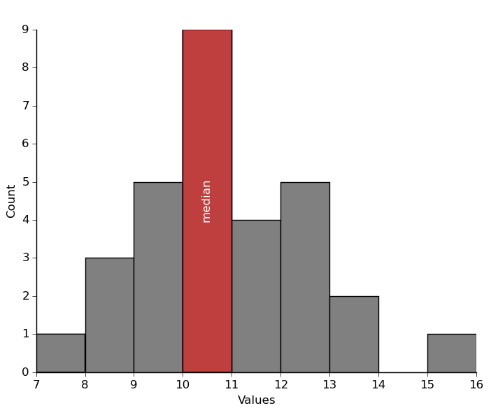

La mediana es el promedio de los números 15 y 16 de la lista ordenada (podemos considerarlo como el número 15,5). Entonces, comenzando desde la izquierda, si sumamos los recuentos en los contenedores del histograma hasta llegar a poco más de 15,5, entonces sabemos que el último contenedor que agregamos debe haber contenido la mediana.

En nuestro ejemplo, los primeros 3 contenedores suman 9 y los primeros 4 contenedores suman 18, por lo que sabemos que la mediana cae en el cuarto contenedor (marcado en rojo), por lo que debe estar entre 10 y 11.

Elegimos el medio (o punto medio) dando una estimación de 10,5.

El algoritmo *binapprox* utiliza el método de la diapositiva anterior, pero ahorra aún más tiempo y espacio al buscar únicamente la mediana dentro de una desviación estándar de la media (consulta el enlace si deseas saber por qué funciona).

El algoritmo completo para un conjunto de $N$ puntos de datos funciona de la siguiente manera:

1. Calcular la media y la desviación estándar, $\mu$ y $\sigma$;

2. Establecer los límites: $minval = \mu - \sigma$ y $maxval = \mu + \sigma$. Cualquier valor $\geq maxval$ se ignora;

3. Establecer el ancho del bin: $width = \dfrac{2\sigma}{B}$;

4. Crear un bin de ignorar para contar valores $value < minval$;

5. Crear $B$ bins para contar valores en $minval$ y $maxval$, por ejemplo, el primer bin es $minval \leq valor < minval + width$;

6. Contar el número de valores que caen en cada bin;

7. Sumar estos conteos hasta que el $total \geq \dfrac{(N + 1)}{2}$. Recuerda comenzar desde el bin de ignorar;

8. Devolver el punto medio del bin que excedió $\dfrac{(N + 1)}{2}$. 

El punto medio de un bin es simplemente el promedio de sus límites mínimo y máximo, es decir, el límite inferior + $\dfrac{width}{2}$.

Tan pronto como el bin relevante se actualiza, el punto de datos que se está colocando en el bin puede eliminarse de la memoria. Así que si estás buscando la mediana de un montón de archivos FITS, solo necesitas tener uno cargado en cualquier momento. (La media y la desviación estándar se pueden calcular a partir de sumas en ejecución, por lo que esto aún se aplica al primer paso).

El inconveniente de usar *binapprox* es que solo obtienes una respuesta precisa hasta $\dfrac{\sigma}{B}$ al usar $B$ bins. Sin embargo, los datos científicos vienen con sus propias incertidumbres, por lo que mientras mantengas $B$ lo suficientemente grande, esto no necesariamente es un problema.


Vamos a implementar el algoritmo binapprox para calcular la mediana de una lista de números. Este algoritmo es bastante complejo, así que lo dividiremos en partes manejables.

Se tiene que escribir dos funciones:

1. `median_bins` para calcular la media, desviación estándar y los contenedores (pasos 1-6 en la diapositiva anterior).
2. `median_approx` que llama a `median_bins` y luego calcula la mediana aproximada (pasos 7-8).

Probaremos cada función por separado.

`median_bins(valores, B)`
Esta función toma una lista de valores y el número de contenedores, B, y devuelve la media (μ) y la desviación estándar (σ) de los valores, el número de valores más pequeños que μ−σ, y un array NumPy con B elementos que contiene los recuentos de los contenedores. Por ejemplo:

Implementemos el algoritmo binapprox para calcular la mediana de una lista de números. Este algoritmo es bastante complejo, por lo que lo dividiremos en partes manejables.

Tu tarea es escribir dos funciones:

Comenzamos con la función mediana_bins. Primero tenemos que calcular la media y la desviación estándar. No nos preocupa la administración de memoria para esta solución ya que estamos trabajando con listas pequeñas, por lo que podemos dejar que NumPy se encargue del cálculo de estas.

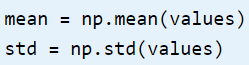

Próximamente configuramos un arreglo para contener los recuentos de todos los contenedores (bins), incluyendo el contenedor (bin) que contiene todos los elementos menores que $\mu - \sigma$ (llamado left\_bin aquí) y los contenedores entre $\mu + \sigma$ y $\mu + \sigma$ (almacenados en el arreglo bins):

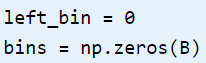


A continuación, recorremos todos los elementos en la lista de entrada, valores, y decidimos a qué contenedor pertenecen. Si el valor es mayor que $\mu + \sigma$, lo ignoramos, ya que no nos ayuda a encontrar la mediana.

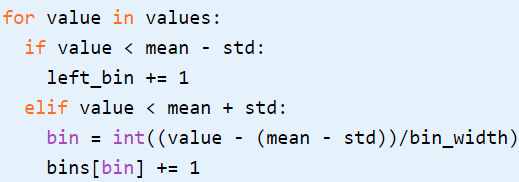

Hay algunas formas de determinar a qué contenedor pertenece el valor actual. Por ejemplo, podrías crear otro bucle dentro de este y iterar a través de todas las posiciones de los contenedores hasta que encuentres el que abarque el valor actual. Dado que estamos trabajando con contenedores igualmente espaciados, la forma más sencilla es tomar el número de anchos de contenedor por el cual el valor actual se encuentra desde $\mu + \sigma$, dado por 
$$(\text{valor} - (\text{media} - \text{desviación estándar}))/\text{ancho del contenedor}$$

y luego redondearlo hacia abajo (la función int no solo redondea el valor sino que también nos permite usarlo como índice de un arreglo).

Al final de la función, devolvemos todos estos objetos para que estén disponibles para la función \textit{median\_approx}.

Esta función está contando desde el contenedor más a la izquierda (que contiene todos los valores menores que $\mu - \sigma$) hasta que llegamos al contenedor que contiene el elemento del medio.

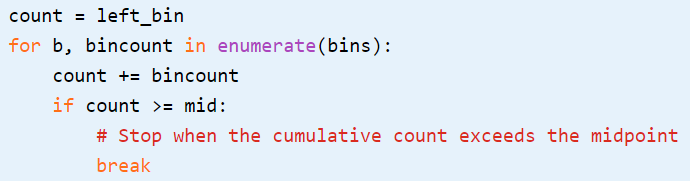

Este bucle for se detiene cuando \(b\) es el índice del contenedor de la mediana. Luego devolvemos el punto medio del contenedor \(b\):

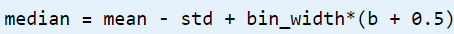

In [39]:
import numpy as np

def median_bins(values, B):
    mean = np.mean(values)
    std = np.std(values)
    
# Initialise bins
    left_bin = 0
    bins = np.zeros(B)
    bin_width = 2*std/B
    
# Bin values
    for value in values:
        if value < mean - std:
            left_bin += 1
        elif value < mean + std:
            bin = int((value - (mean - std))/bin_width)
            bins[bin] += 1
    # Ignore values above mean + std

    return mean, std, left_bin, bins


def median_approx(values, B):
    # Call median_bins to calculate the mean, std,
    # and bins for the input values
    mean, std, left_bin, bins = median_bins(values, B)
            
    # Position of the middle element
    N = len(values)
    mid = (N + 1)/2

    count = left_bin
    for b, bincount in enumerate(bins):
        count += bincount
        if count >= mid:
        # Stop when the cumulative count exceeds the midpoint
            break

    width = 2*std/B
    median = mean - std + width*(b + 0.5)
    return median

for b, bincount in enumerate(bins):

enumerate(bins) es una función que devuelve una secuencia de pares (índice, valor) para cada elemento en la lista bins.

b, bincount es una forma de desempaquetar esos pares en dos variables distintas: b y bincount.

b tomará el valor del índice de bins en cada iteración.
bincount tomará el valor del conteo de elementos en ese contenedor.

Esta sintaxis es equivalente a hacer algo como:

for i in range(len(bins)):

    b = i
    
    bincount = bins[i]

### Para archivos FITS

Utiliza el algoritmo binapprox para estimar de manera eficiente la mediana de cada píxel a partir de un conjunto de imágenes astronómicas en archivos FITS.

Escribe las funciones `median_bins_fits` y `median_approx_fits` que tomen una lista de nombres de archivos FITS y el número de contenedores. Deben comportarse como las funciones del problema anterior, pero operar en imágenes astronómicas 2D de los archivos FITS.

Amplía tu código del problema anterior para manejar arreglos 2D.

Para calcular la media y la desviación estándar de los archivos FITS, te hemos proporcionado una función auxiliar llamada `running_stats` que las calcula en un solo paso sin retener las imágenes en la memoria. Devuelve una tupla con la media y la desviación estándar.

Mientras que tus funciones del problema anterior devolvían números individuales para la media, la desviación estándar, la mediana y los contenedores, ahora deben devolver arreglos, ya que queremos calcular estos valores a lo largo del conjunto de archivos FITS.

Los arreglos deben tener la misma forma que los archivos FITS originales, es decir, (200, 200), y tener una dimensión adicional para los contenedores.

Para verificar que tus funciones funcionen correctamente, puedes compararlas con el siguiente ejemplo. Dado que los arreglos son bastante grandes, solo observaremos los valores centrales: [se proporciona un ejemplo].

Este problema es esencialmente una combinación del problema anterior sobre archivos FITS y el problema de binapprox. Para resolverlo, utilizamos la solución a la pregunta de binapprox y la adaptamos para trabajar con una lista de arreglos 2D en lugar de solo una lista individual, y utilizamos el módulo Astropy para leer los archivos FITS.

Dado que queremos calcular la mediana a lo largo del conjunto de archivos FITS, tratamos cada elemento de los arreglos de manera individual. Para empezar, utilizamos `running_stats` para calcular la media y la desviación estándar a lo largo de todos los archivos; ahora son arreglos con forma (200, 200). Los objetos en los que almacenamos los conteos de contenedores en el último problema ahora los implementamos también como arreglos, donde el arreglo de contenedores tiene una dimensión adicional, de modo que su forma se convierte en (200, 200, B), donde B es el número de contenedores.

Luego, para llenar el arreglo de contenedores, leemos un archivo FITS a la vez y recorremos todos los elementos del arreglo para verificar en qué contenedor pertenecen.

Finalmente, importamos los resultados de `median_bins_FITS` en la función `median_approx_FITS` y recorremos los elementos de los arreglos de conteo de contenedores para calcular la mediana. Compara esta solución en detalle con la solución del problema anterior.

In [40]:
from astropy.io import fits
from helper import running_stats
import numpy as np



def median_bins_fits(filenames, B):
    # Calculate the mean and standard dev
    mean, std = running_stats(filenames)
        
    dim = mean.shape # Dimension of the FITS file arrays
        
    # Initialise bins
    left_bin = np.zeros(dim)
    bins = np.zeros((dim[0], dim[1], B))
    bin_width = 2 * std / B 

    # Loop over all FITS files
    for filename in filenames:
        hdulist = fits.open(filename)
        data = hdulist[0].data

        # Loop over every point in the 2D array
        for i in range(dim[0]):
            for j in range(dim[1]):
                value = data[i, j]
                mean_ = mean[i, j]
                std_ = std[i, j]

                if value < mean_ - std_:
                    left_bin[i, j] += 1
                    
                elif value >= mean_ - std_ and value < mean_ + std_:
                    bin = int((value - (mean_ - std_))/bin_width[i, j])
                    bins[i, j, bin] += 1

    return mean, std, left_bin, bins


def median_approx_fits(filenames, B):
    mean, std, left_bin, bins = median_bins_fits(filenames, B)
        
    dim = mean.shape # Dimension of the FITS file arrays
        
    # Position of the middle element over all files
    N = len(filenames)
    mid = (N + 1)/2
        
    bin_width = 2*std / B
    # Calculate the approximated median for each array element
    median = np.zeros(dim)   
    for i in range(dim[0]):
        for j in range(dim[1]):    
            count = left_bin[i, j]
            for b, bincount in enumerate(bins[i, j]):
                count += bincount
                if count >= mid:
            # Stop when the cumulative count exceeds the midpoint
                    break
            median[i, j] = mean[i, j] - std[i, j] + bin_width[i, j]*(b + 0.5)
        
    return median

ModuleNotFoundError: No module named 'grp'

In [41]:
mean, std, left_bin, bins = median_bins_fits(['iimage0.fits', 'iimage1.fits', 'iimage2.fits'], 5)
median = median_approx_fits(['iimage0.fits', 'iimage1.fits', 'iimage2.fits'], 5)
mean[100, 100]

NameError: name 'median_bins_fits' is not defined

# AGN

Al investigar objetos astronómicos, como los núcleos galácticos activos (AGN), los astrónomos comparan datos sobre esos objetos de diferentes telescopios en diferentes longitudes de onda.

Esto requiere una coincidencia cruzada posicional para encontrar la contraparte más cercana dentro de un radio determinado en el cielo.

En esta actividad compararás dos catálogos: uno de un estudio de radio, el catálogo de muestras de fuente brillante (BSS) AT20G y otro de un estudio óptico, el catálogo de galaxias de todo el cielo SuperCOSMOS.

El catálogo BSS enumera las fuentes más brillantes del estudio de radio AT20G, mientras que el catálogo SuperCOSMOS enumera las galaxias observadas mediante estudios de luz visible. Si podemos encontrar una coincidencia óptica para nuestra fuente de radio, estaremos un paso más cerca de determinar qué tipo de objeto es, p. una galaxia en el Universo local o un quásar distante.

Hemos elegido un catálogo pequeño (BSS tiene sólo 320 objetos) y uno grande (SuperCOSMOS tiene alrededor de 240 millones) para demostrar los problemas que puede encontrar al implementar algoritmos de coincidencia cruzada.

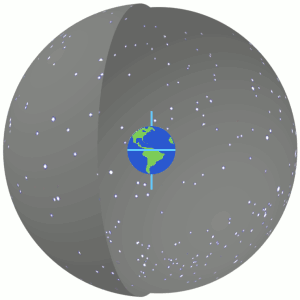

https://groklearning-cdn.com/modules/5JAX7dX9j4wdXKXRHwyECd/Ra_and_dec_demo.gif

Las posiciones de estrellas, galaxias y otros objetos astronómicos suelen registrarse en coordenadas ecuatoriales o galácticas.

Las coordenadas ecuatoriales son fijas con respecto a la esfera celeste, por lo que las posiciones son independientes de cuándo o dónde tuvieron lugar las observaciones. Se definen en relación con el ecuador celeste (que está en el mismo plano que el ecuador terrestre) y la eclíptica (el camino que recorre el sol a lo largo del año).

Un punto de la esfera celeste está dado por dos coordenadas:

Ascensión recta: el ángulo desde el equinoccio de primavera hasta el punto que va hacia el este a lo largo del ecuador celeste;

Declinación: el ángulo desde el ecuador celeste hasta el punto que va hacia el norte (los valores negativos indican que va hacia el sur).

El equinoccio de primavera es la intersección del ecuador celeste y la eclíptica, donde la eclíptica se eleva por encima del ecuador celeste yendo más al este.

Las coordenadas de las estrellas en el cielo cambiarán ligeramente a lo largo de los años debido al lento bamboleo del eje de la Tierra. Por tanto, es importante especificar la época o período de tiempo que estamos utilizando como referencia para el sistema de coordenadas celestes.

La ascensión recta a menudo se expresa en notación de horas-minutos-segundos (HMS), porque era conveniente calcular cuándo aparecería una estrella en el horizonte. Un círculo completo en notación HMS equivale a 24 horas, lo que significa que 1 hora en notación HMS equivale a 15 grados.

Cada hora se divide en 60 minutos y cada minuto en 60 segundos.

Puedes convertir 23 horas, 12 minutos y 6 segundos (escritos como 23:12:06 o 23h12m06s) a grados como este:

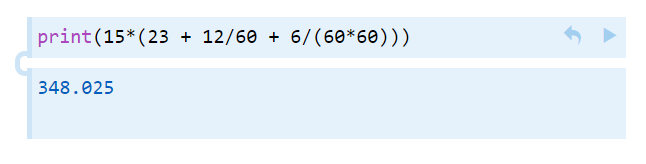

La declinación, por otro lado, se registra tradicionalmente en notación de grados-minutos-segundos (DMS). Un círculo completo mide 360 ​​grados, cada grado tiene 60 minutos de arco y cada minuto de arco tiene 60 segundos de arco.

Por ejemplo: 73 grados, 21 minutos de arco y 14,4 segundos de arco (escritos 73:21:14.4 o 73° 21' 14.4" o 73d21m14.4s) se pueden convertir a grados decimales de esta manera:

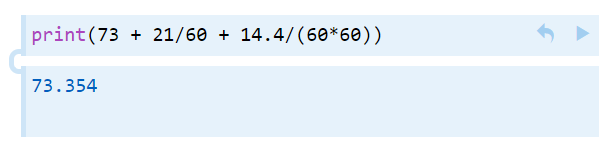

Con ángulos negativos como -5° 31' 12" la negación se aplica a todo el ángulo, incluidos los minutos y segundos de arco:

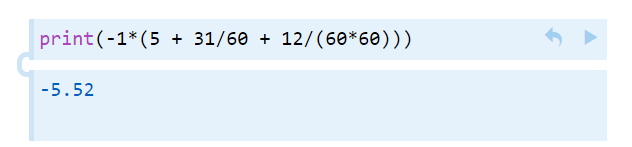

Nota:

¡los minutos de arco y los minutos son diferentes!
¡Los minutos y segundos de arco en DMS no son lo mismo que los minutos y segundos en HMS! Un minuto en HMS equivale a 15 minutos de arco en DMS y un segundo equivale a 15 segundos de arco.

In [45]:
def hms2dec(h, m, s):
    total = h + m/60 + s/3600
    total = total*15
    return total

In [ ]:
hms2dec(23, 12, 6)

348.025

In [46]:
def dms2dec(h, m, s):
    if h>0:
        total = h + m/60 + s/3600
    elif h<0:
        total = h - m/60 - s/3600
    return total

In [ ]:
dms2dec(22, 57, 18)

22.955

In [ ]:
dms2dec(-66, 5, 5.1)

-66.08475


Para cruzar dos catálogos, necesitamos comparar la distancia angular entre objetos en la esfera celeste.

La gente suele llamar a esto "distancia", pero técnicamente es una distancia angular: el ángulo proyectado entre objetos visto desde la Tierra.

Si tenemos un objeto en la esfera celeste con ascensión recta y declinación $(\alpha_1, \delta_1)$, entonces la distancia angular a otro objeto con coordenadas $(\alpha_2, \delta_2)$ es:

$$ d = 2 \arcsin\left(\sqrt{\sin^2 \dfrac{|\delta_1 - \delta_2|}{2} + \cos\delta_1 \cos\delta_2 \sin^2 \dfrac{|\alpha_1 - \alpha_2|}{2}}\right) $$

Las distancias angulares tienen las mismas unidades que los ángulos (grados). Hay otras ecuaciones para calcular la distancia angular, pero esta, llamada la fórmula del semiverseno (haversine), es buena para evitar errores de punto flotante cuando los dos puntos están cerca uno del otro.

Veremos un ejemplo de cómo implementar la fórmula que viste en la diapositiva anterior usando las funciones trigonométricas de NumPy. Tenga en cuenta que las funciones trigonométricas de NumPy solo toman radianes como entrada, por lo que debe convertir sus coordenadas cuando sea necesario.

Primero, dividamos la fórmula en partes más pequeñas:

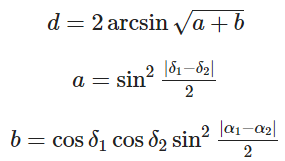

Podemos calcular $b$ utilizando las funciones sin, cos y abs de NumPy:

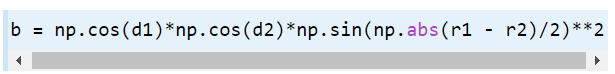

Aquí, $ r_1 $ y $ d_1 $ son las coordenadas del primer punto $(\alpha_1, \delta_1)$, y $ r_2 $ y $ d_2 $ corresponden de manera similar a $\alpha_2$ y $\delta_2$.

La variable $ a $ puede calcularse de manera similar utilizando solo las funciones sin y abs. Una vez que tengamos tanto $ a $ como $ b $, podemos utilizar numpy.arcsin para calcular $ d $:

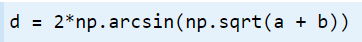

Usando NumPy, el código funciona con fuentes individuales o con conjuntos de fuentes.

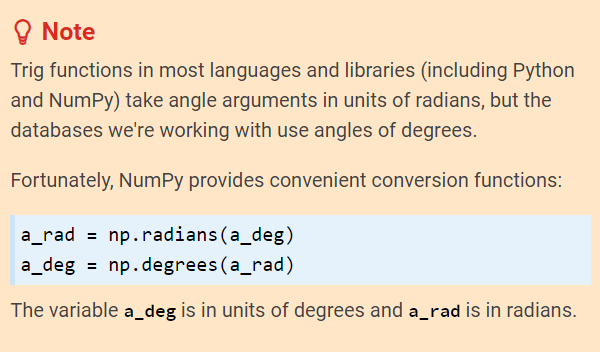

Escribe una función llamada `angular_dist` que calcule la distancia angular entre cualquier par de puntos en la esfera celeste, dados su ascensión recta y declinación.

Tu función debería tomar argumentos en grados decimales y devolver la distancia en grados decimales también.

Aquí tienes un ejemplo de cómo debería funcionar tu función:

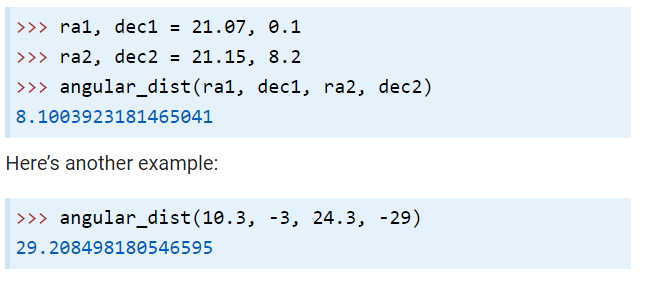

In [47]:
import numpy as np
def angular_dist(ra1, dec1, ra2, dec2):
    r1, d1 = np.radians(ra1), np.radians(dec1)
    r2, d2 = np.radians(ra2), np.radians(dec2)
    
    b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1-r2)/2)**2
    a = np.sin(np.abs(d1-d2)/2)**2
    
    d = 2*np.arcsin(np.sqrt(a+b))
    
    return np.degrees(d)

In [48]:
ra1, dec1 = 21.07, 0.1
ra2, dec2 = 21.15, 8.2
angular_dist(ra1, dec1, ra2, dec2)

8.100392318146504

In [49]:
angular_dist(10.3, -3, 24.3, -29)

29.208498180546595

Antes de poder cotejar nuestros dos catálogos, primero debemos importar los datos en bruto. Cada catálogo astronómico tiende a tener su propio formato único, por lo que necesitaremos analizar cómo hacer esto con cada uno de manera individual.

Comenzaremos revisando la encuesta de la muestra de fuentes brillantes AT20G. Los datos en bruto que utilizaremos son del archivo table2.dat de esta página en los archivos de VizieR, pero a partir de ahora usaremos el nombre de archivo bss.dat.

Cada catálogo en VizieR tiene un detallado archivo README que proporciona el formato exacto de cada tabla en el catálogo.

El catálogo completo de fuentes de radio brillantes contiene 320 objetos. Las primeras filas se ven así (desplácese hacia la derecha para verlo todo):

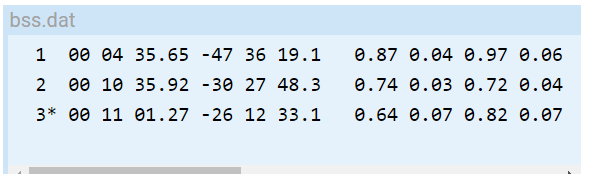

El catálogo está organizado en columnas de ancho fijo, siendo el formato de las columnas:

1: Número de identificación del catálogo de objetos (a veces con un asterisco)

2-4: Ascensión recta en notación HMS

5-7: Declinación en notación DMS

8-: Otra información, incluidas intensidades espectrales

Sólo necesitamos coordenadas para el cruce. Podemos cargar columnas específicas con el argumento usecols en la función loadtxt de NumPy:

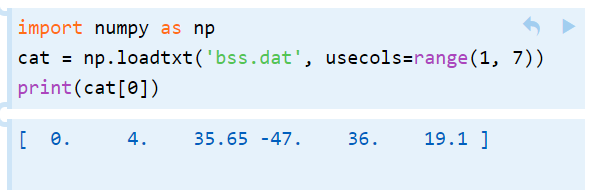

Nos hemos saltado la columna de ID, ya que el número de ID es siempre el mismo que el número de fila.

Columnas de ancho fijo y loadtxt
`loadtxt` no funciona para columnas de ancho fijo si faltan valores. Dado que no hay valores faltantes para ID, RA y dec, está bien usarlo para cargar las primeras columnas del catálogo BSS.

### SuperCOSMOS all-sky catalogue

http://ssa.roe.ac.uk/allSky

El catálogo de todo el cielo SuperCOSMOS es un catálogo de galaxias generado a partir de varios estudios de luz visible.

Los datos originales están disponibles en esta página en un paquete llamado SCOS_XSC_mCl1_B21.5_R20_noStepWedges.csv.gz. Debido a que este catálogo es tan grande, lo hemos reducido para estas actividades. La versión reducida del archivo se denominará super.csv.

Las primeras líneas de super.csv tienen este aspecto:

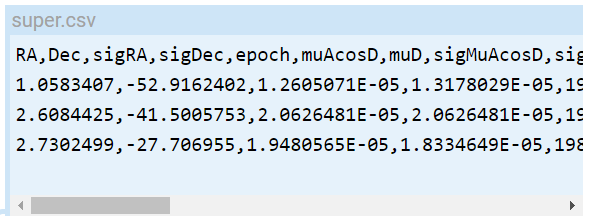

El catálogo utiliza un formato de valores separados por comas (CSV). Aparte de la primera fila, que contiene etiquetas de columnas, el formato es:

1: Ascensión recta en grados decimales

2: Declinación en grados decimales

3: Otros datos, incluida la magnitud y la forma aparente

Entonces, ahora, al cargar este archivo, tenemos que decirle a np.loadtxt que omita la primera fila y trate las comas como delimitadores:

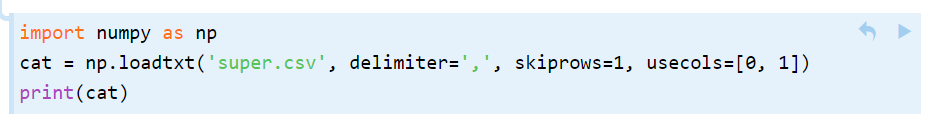

Escriba las funciones import_bss e import_super que importen los catálogos AT20G BSS y SuperCOSMOS desde los archivos bss.dat y super.csv como se describe en las diapositivas anteriores.

Cada función debe devolver una lista de tuplas que contienen el ID del objeto (un número entero) y las coordenadas en grados. El ID del objeto debe ser la fila del objeto en el catálogo, comenzando en 1.

Tus funciones deberían funcionar así:

In [50]:
def import_bss():
    data = np.loadtxt('bss.dat', usecols = range(1,7))
    res = []
    for i, row in enumerate(data, 1):
        res.append((i, hms2dec(row[0], row[1], row[2]), dms2dec(row[3], row[4], row[5])))
    return res

def import_super():
    data = np.loadtxt('super.csv', delimiter=',', skiprows=1, usecols=(0, 1))
    res = []
    
    for i, row in enumerate(data, 1):
        res.append((i, row[0], row[1]))
    return res

In [51]:
import_bss()

[(1, 1.1485416666666666, -47.60530555555556),
 (2, 2.6496666666666666, -30.463416666666667),
 (3, 2.7552916666666665, -26.209194444444442),
 (4, 3.2495416666666666, -39.907333333333334),
 (5, 6.4549166666666675, -26.03686111111111),
 (6, 6.568333333333333, -35.21372222222222),
 (7, 9.561333333333334, -24.98386111111111),
 (8, 12.497833333333332, -57.641),
 (9, 12.789583333333333, -42.442361111111104),
 (10, 14.694333333333335, -56.9865),
 (11, 15.562791666666666, -80.2111388888889),
 (12, 15.577708333333334, -75.78138888888888),
 (13, 16.687958333333334, -40.57208333333334),
 (14, 19.453374999999998, -21.185388888888887),
 (15, 19.73875, -21.691694444444444),
 (16, 20.132125, -27.0235),
 (17, 21.239041666666665, -51.22113888888889),
 (18, 23.181374999999996, -16.91338888888889),
 (19, 23.27404166666667, -52.000972222222224),
 (20, 23.490000000000002, -36.493027777777776),
 (21, 23.633916666666668, -38.72602777777778),
 (22, 24.409708333333334, -24.51488888888889),
 (23, 25.792208333333

In [ ]:
import_super() 

[(1, 1.0583407, -52.9162402),
 (2, 2.6084425, -41.5005753),
 (3, 2.7302499, -27.706955)]

In [52]:
# Ejemplo
my_list = ['a', 'b', 'c']

for index, value in enumerate(my_list, 1):
    print(f'Index: {index}, Value: {value}')

Index: 1, Value: a
Index: 2, Value: b
Index: 3, Value: c


Escribe una función `find_closest` que tome un catálogo y la posición de una fuente objetivo (una ascensión recta y declinación) y encuentre la coincidencia más cercana para la fuente objetivo en el catálogo.

Tu función debería devolver el ID del objeto más cercano y la distancia a ese objeto.

La ascensión recta y la declinación están en grados. La lista del catálogo ha sido cargada por `import_bss` de la pregunta anterior. El catálogo completo de 320 objetos BSS está contenido en `bss.dat` para que puedas probar tu código.

**Código Python:**

En esta solución, recorremos cada elemento en la lista y extraemos su ascensión recta (RA) y declinación individuales, utilizando `angular_dist` para encontrar la distancia desde el punto dado hasta el objeto actual.

La parte crítica es el bucle sobre el catálogo y la comparación con la distancia del objeto más cercano hasta el momento:

```python
min_dist = np.inf
min_id = None
for id1, ra2, dec1 in cat:
  dist = angular_dist(ra1, dec1, ra, dec)
  if dist < min_dist:
    min_id = id1
    min_dist = dist
```
Aquí solo llevamos un seguimiento del objeto más cercano hasta el momento y lo descartamos si el objeto actual en el bucle es más cercano.

```python
# Write your find_closest function here
import numpy as np

def hms2dec(hr, m, s):
  dec = hr + m/60 + s/3600
  return dec*15

def dms2dec(d, m, s):
  sign = d/abs(d)
  dec = abs(d) + m/60 + s/3600
  return sign*dec

def import_bss():
  res = []
  data = np.loadtxt('bss.dat', usecols=range(1, 7))
  for i, row in enumerate(data, 1):
    res.append((i, hms2dec(row[0], row[1], row[2]), dms2dec(row[3], row[4], row[5])))
  return res

def import_super():
  data = np.loadtxt('super.csv', delimiter=',', skiprows=1, usecols=[0, 1])
  res = []
  for i, row in enumerate(data, 1):
    res.append((i, row[0], row[1]))
  return res

def angular_dist(ra1, dec1, ra2, dec2):
  # Convert to radians
  r1 = np.radians(ra1)
  d1 = np.radians(dec1)
  r2 = np.radians(ra2)
  d2 = np.radians(dec2)

  a = np.sin(np.abs(d1 - d2)/2)**2
  b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2

  angle = 2*np.arcsin(np.sqrt(a + b))
    
  # Convert back to degrees
  return np.degrees(angle)

def find_closest(cat, ra, dec):
  min_dist = np.inf
  min_id = None
  for id1, ra1, dec1 in cat:
    dist = angular_dist(ra1, dec1, ra, dec)
    if dist < min_dist:
      min_id = id1
      min_dist = dist
    
  return min_id, min_dist

```

La función `find_closest` tiene como objetivo encontrar el objeto más cercano en un catálogo astronómico dado un punto objetivo definido por sus coordenadas de ascensión recta (`ra`) y declinación (`dec`). Aquí está un desglose detallado:

```python
def find_closest(cat, ra, dec):
  min_dist = np.inf  # Inicializa la distancia mínima como infinito
  min_id = None      # Inicializa el ID del objeto más cercano como None

  # Itera sobre cada objeto en el catálogo
  for id1, ra1, dec1 in cat:
    # Calcula la distancia angular entre el objeto actual y el punto objetivo
    dist = angular_dist(ra1, dec1, ra, dec)

    # Compara la distancia actual con la distancia mínima registrada
    if dist < min_dist:
      # Si la distancia actual es menor, actualiza el ID y la distancia mínima
      min_id = id1
      min_dist = dist
    
  # Retorna el ID y la distancia del objeto más cercano en el catálogo
  return min_id, min_dist
```

Desglose de la función:

1. `min_dist = np.inf`: Inicializa la variable `min_dist` con infinito (`np.inf`). Esta variable se utilizará para realizar un seguimiento de la distancia mínima encontrada durante la iteración.

2. `min_id = None`: Inicializa la variable `min_id` con `None`. Esta variable se utilizará para realizar un seguimiento del ID del objeto que tiene la distancia mínima.

3. `for id1, ra1, dec1 in cat:`: Inicia un bucle `for` que itera sobre cada elemento en el catálogo (`cat`). Cada elemento del catálogo es una tupla que contiene el ID, la ascensión recta (`ra1`), y la declinación (`dec1`) de un objeto astronómico.

4. `dist = angular_dist(ra1, dec1, ra, dec)`: Calcula la distancia angular entre el objeto actual y el punto objetivo utilizando la función `angular_dist` definida anteriormente.

5. `if dist < min_dist:`: Compara la distancia actual (`dist`) con la distancia mínima registrada hasta ahora (`min_dist`).

6. `min_id = id1`: Si la distancia actual es menor que la distancia mínima registrada, actualiza el ID del objeto más cercano (`min_id`) con el ID del objeto actual.

7. `min_dist = dist`: Actualiza la distancia mínima (`min_dist`) con la distancia actual.

8. Finalmente, la función retorna una tupla que contiene el ID y la distancia del objeto más cercano en el catálogo.

En resumen, la función `find_closest` itera sobre el catálogo, calcula la distancia angular entre cada objeto y el punto objetivo, y registra el ID y la distancia del objeto más cercano encontrado durante la iteración.

Ahora tienes todas las herramientas necesarias para cruzar los catálogos BSS y SuperCOSMOS. En el próximo problema, combinarás todo para ver cuántas de las fuentes de radio brillantes en el catálogo BSS tienen un homólogo en el catálogo SuperCOSMOS. El proceso que debes seguir es el siguiente:

1. Selecciona un objeto del catálogo BSS.
2. Recorre todos los objetos en SuperCOSMOS y encuentra el más cercano al objeto BSS.
3. Si los objetos están lo suficientemente cerca, registra la coincidencia.
4. Repite los pasos 1-3 para todos los demás objetos en el catálogo BSS.

En el paso 3, si el objeto más cercano no está dentro de una distancia dada, es poco probable que los dos objetos sean homólogos, y es más probable que simplemente estén cerca.

La distancia dada que elijas depende de la incertidumbre de las posiciones medidas de los objetos en cada catálogo.

Aunque estamos haciendo el emparejamiento cruzado basado únicamente en coordenadas celestiales en el siguiente ejercicio, hay otras propiedades que podríamos considerar al realizar investigaciones, como el brillo y el color de un objeto.

Escribe una función de coincidencia cruzada que compare dos catálogos dentro de una distancia máxima. Debería devolver una lista de coincidencias y no coincidencias para el primer catálogo respecto al segundo.

La lista de coincidencias contiene tuplas de los ID de objetos del primer y segundo catálogo y su distancia. La lista de no coincidencias contiene los ID de los objetos no emparejados del primer catálogo únicamente. Ambas listas deben estar ordenadas por los ID del primer catálogo.

Los catálogos BSS y SuperCOSMOS se proporcionarán como argumentos de entrada, cada uno en el formato que has visto anteriormente. La distancia máxima se proporciona en grados decimales.

Así es como debería funcionar la coincidencia cruzada en nuestros catálogos de muestra con una distancia máxima de 40 segundos de arco:

```python
bss_cat = import_bss()
super_cat = import_super()
max_dist = 40/3600
matches, no_matches = crossmatch(bss_cat, super_cat, max_dist)
print(matches[:3])
print(no_matches[:3])
print(len(no_matches))

[(1, 2, 0.00010988610938710059), (2, 4, 0.00076498459672424946), (3, 5, 0.00020863352870707666)]
[5, 6, 11]
9
```
Solo 9 objetos no tienen coincidencia. Intentemos con un máximo de 5 segundos de arco:

```python
bss_cat = import_bss()
super_cat = import_super()
max_dist = 5/3600
matches, no_matches = crossmatch(bss_cat, super_cat, max_dist)
print(matches[:3])
print(no_matches[:3])
print(len(no_matches))

[(1, 2, 0.00010988610938710059), (2, 4, 0.00076498459672424946), (3, 5, 0.00020863352870707666)]
[5, 6, 11]
40
```
Ahora 40 objetos no tienen coincidencia con un radio de búsqueda más ajustado.

In [53]:
def find_closest(cat, ra, dec):
    min_dist = np.inf
    min_id = None
    for id1, ra1, dec1 in cat:
        dist = angular_dist(ra1, dec1, ra, dec)
        if dist < min_dist:
            min_id = id1
            min_dist = dist
        
    return min_id, min_dist

Esto es bastante similar a la solución del problema anterior, excepto que ahora tenemos un bucle adicional para recorrer todos los objetos de SuperCOSMOS para cada objeto de BSS. Al final del bucle sobre los objetos de SuperCOSMOS, se encuentra el objeto más cercano y, si está más cerca que el radio máximo, se registra una coincidencia. De lo contrario, se registra una no coincidencia.

In [54]:
import numpy as np

def angular_dist(RA1, dec1, RA2, dec2):
    # Convert to radians
    r1 = np.radians(RA1)
    d1 = np.radians(dec1)
    r2 = np.radians(RA2)
    d2 = np.radians(dec2)
    
    deltar = np.abs(r1 - r2)
    deltad = np.abs(d1 - d2)
    angle = 2*np.arcsin(np.sqrt(np.sin(deltad/2)**2 
                        + np.cos(d1)*np.cos(d2)*np.sin(deltar/2)**2))
    
    # Convert back to degrees
    return np.degrees(angle)

def crossmatch(cat1, cat2, max_radius):
    matches = []
    no_matches = []
    for id1, ra1, dec1 in cat1:
        closest_dist = np.inf
        closest_id2 = None
        for id2, ra2, dec2 in cat2:
            dist = angular_dist(ra1, dec1, ra2, dec2)
            if dist < closest_dist:
                closest_id2 = id2
                closest_dist = dist
        
        # Ignore match if it's outside the maximum radius
        if closest_dist > max_radius:
            no_matches.append(id1)
        else:
            matches.append((id1, closest_id2, closest_dist))

    return matches, no_matches

In [55]:
import numpy as np

def hms2dec(h, m, s):
    total = h + m/60 + s/3600
    total = total*15
    return total

def dms2dec(h, m, s):
    if h>0:
        total = h + m/60 + s/3600
    elif h<0:
        total = h - m/60 - s/3600
    return total

def import_bss():
    data = np.loadtxt('bss.dat', usecols = range(1,7))
    res = []
    for i, row in enumerate(data, 1):
        res.append((i, hms2dec(row[0], row[1], row[2]), dms2dec(row[3], row[4], row[5])))
    return res

def import_super():
    data = np.loadtxt('super.csv', delimiter=',', skiprows=1, usecols=(0, 1))
    res = []
    for i, row in enumerate(data, 1):
        res.append((i, row[0], row[1]))
    return res

def angular_dist(RA1, dec1, RA2, dec2):
    # Convert to radians
    r1 = np.radians(RA1)
    d1 = np.radians(dec1)
    r2 = np.radians(RA2)
    d2 = np.radians(dec2)
    
    deltar = np.abs(r1 - r2)
    deltad = np.abs(d1 - d2)
    angle = 2*np.arcsin(np.sqrt(np.sin(deltad/2)**2 
                        + np.cos(d1)*np.cos(d2)*np.sin(deltar/2)**2))
    # Convert back to degrees
    return np.degrees(angle)

def crossmatch(cat1, cat2, max_radius):
    matches = []
    no_matches = []
    for id1, ra1, dec1 in cat1:
        closest_dist = np.inf
        closest_id2 = None
        for id2, ra2, dec2 in cat2:
            dist = angular_dist(ra1, dec1, ra2, dec2)
            if dist < closest_dist:
                closest_id2 = id2
                closest_dist = dist
        # Ignore match if it's outside the maximum radius
        if closest_dist > max_radius:
            no_matches.append(id1)
        else:
            matches.append((id1, closest_id2, closest_dist))
    return matches, no_matches

In [56]:
bss_cat = import_bss()
super_cat = import_super()
max_dist = 40/3600
matches, no_matches = crossmatch(bss_cat, super_cat, max_dist)
print(matches[:3])
print(no_matches[:3])
print(len(no_matches))

[(1, 2, 0.00010988610938710059), (2, 4, 0.0007649845967242494), (3, 5, 0.00020863352870707666)]
[5, 6, 11]
151


In [57]:
bss_cat = import_bss()
super_cat = import_super()
max_dist = 5/3600
matches, no_matches = crossmatch(bss_cat, super_cat, max_dist)
print(matches[:3])
print(no_matches[:3])
print(len(no_matches))

[(1, 2, 0.00010988610938710059), (2, 4, 0.0007649845967242494), (3, 5, 0.00020863352870707666)]
[5, 6, 11]
197


Es posible que hayas notado que el cruce de datos está llevando mucho tiempo, incluso con catálogos significativamente reducidos.

Hemos visto esto antes: algoritmos ineficientes.

La forma en que hemos implementado nuestro cruce de datos significa que, para cada objeto en BSS, necesitamos calcular la distancia a cada objeto en SuperCOSMOS. Incluso nuestra pequeña tarea de cruce requiere 160 × 500 = 80,000 cálculos de distancia.

Con cada cálculo de distancia tomando unos pocos microsegundos, rápidamente se acumula en segundos o minutos.

Los segundos pueden no parecer mucho, pero recuerda que el catálogo completo de SuperCOSMOS tiene 126 millones de objetos, más de 250,000 veces más grande que la versión truncada que te dimos para trabajar.

Entonces, imagina que intentas cruzar un catálogo que no sea AT20G BSS, con un tamaño comparable a SuperCOSMOS. Una operación de cruce de datos como esa podría llevar meses o incluso años.

Claramente, necesitamos ser más inteligentes en nuestra elección de algoritmo.

En esta actividad, vamos a modificar nuestro cruce de datos anterior para mostrarte lo fácil que es ahorrar tiempo de cómputo.

En el cruce de datos que desarrollaste en la actividad anterior, fue necesario convertir la ascensión recta (RA) y la declinación de grados a radianes para que las funciones trigonométricas pudieran trabajar con ellas.

Si esta conversión ocurriera en la función de cálculo de distancia, entonces las mismas coordenadas se convertirían muchas veces durante la operación de cruce de datos.

En el próximo problema, te pediremos que modifiques tu algoritmo de cruce de datos para que la conversión ocurra solo una vez, antes de cualquier cálculo de distancia. Esto debería ahorrar solo una pequeña cantidad de tiempo, pero todo suma al final.

Dado que nuestro enfoque a partir de ahora será mejorar nuestro algoritmo, utilizaremos catálogos generados aleatoriamente en lugar de SuperCOSMOS y AT20G BSS. Esto nos permitirá ver si nuestros cambios están mejorando la eficiencia de nuestro algoritmo en general, en lugar de simplemente encontrar algo que funcione para dos catálogos específicos.

Escribe una función de cruce de datos para dos catálogos dentro de un radio máximo. Los catálogos son matrices NumPy bidimensionales de RA (ascensión recta) y declinación en grados.

Tu función debería convertir todas las coordenadas a radianes antes de comenzar el cruce de datos. Debería devolver 3 valores:

1. Una lista de tuplas de IDs coincidentes y sus distancias en grados.
2. Una lista de IDs no coincidentes del primer catálogo.
3. El tiempo transcurrido (en segundos) para ejecutar el cruce de datos.

Ambos catálogos se proporcionan como una matriz NumPy de dimensiones N×2 de números decimales. Cada fila contiene las coordenadas de un objeto individual, y las dos columnas representan la RA y la declinación.

El ID de un objeto es el índice de su fila, comenzando desde 0. Tu función debería funcionar con catálogos de entrada que tengan cualquier número de objetos.

Aquí tienes un ejemplo de cómo debería funcionar tu función:

In [58]:
import numpy as np
import time

def angular_dist(r1, d1, r2, d2):
    a = np.sin(np.abs(d1 - d2)/2)**2
    b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
    return 2*np.arcsin(np.sqrt(a + b))

def crossmatch(cat1, cat2, max_radius):
    start = time.perf_counter()
    max_radius = np.radians(max_radius)    
    matches = []
    no_matches = []
# Convert coordinates to radians
    cat1 = np.radians(cat1)
    cat2 = np.radians(cat2)
    for id1, (ra1, dec1) in enumerate(cat1):
        min_dist = np.inf
        min_id2 = None
        for id2, (ra2, dec2) in enumerate(cat2):
            dist = angular_dist(ra1, dec1, ra2, dec2)
            if dist < min_dist:
                min_id2 = id2
                min_dist = dist            
        # Ignore match if it's outside the maximum radius
            if min_dist > max_radius:
                no_matches.append(id1)
            else:
                matches.append((id1, min_id2, np.degrees(min_dist)))        
    time_taken = time.perf_counter() - start
    return matches, no_matches, time_taken

Vamos a analizar el código paso a paso:

### Función `angular_dist(r1, d1, r2, d2):`
Esta función calcula la distancia angular entre dos puntos en el cielo dados sus ángulos de ascensión recta (`r1` y `r2`) y declinación (`d1` y `d2`). Utiliza la fórmula de la distancia angular en una esfera.

- `a` calcula la primera parte de la fórmula, relacionada con las diferencias en la declinación.
- `b` calcula la segunda parte de la fórmula, relacionada con las diferencias en la ascensión recta.
- La función retorna el doble del arcoseno de la raíz cuadrada de la suma de `a` y `b`, representando así la distancia angular en radianes.

### Función `crossmatch(cat1, cat2, max_radius):`
Esta función realiza el cruce de datos entre dos catálogos astronómicos dados (`cat1` y `cat2`) dentro de un radio máximo especificado (`max_radius`). 

- `start` registra el tiempo de inicio del proceso.
- `max_radius` se convierte de grados a radianes.
- Se inicializan listas vacías para almacenar las coincidencias (`matches`) y las no coincidencias (`no_matches`).
- Se convierten las coordenadas de ambos catálogos de grados a radianes.
- Se inicia un bucle que itera sobre los objetos del primer catálogo (`cat1`).
  - Para cada objeto en `cat1`, se inicializa una distancia mínima (`min_dist`) como infinito y un identificador (`min_id2`) como nulo.
  - Se inicia otro bucle que itera sobre los objetos del segundo catálogo (`cat2`).
    - Se calcula la distancia angular entre el objeto actual de `cat1` y todos los objetos de `cat2` utilizando la función `angular_dist`.
    - Si la distancia calculada es menor que la distancia mínima registrada hasta ahora, se actualiza la distancia mínima y el identificador del objeto correspondiente en `cat2`.
  - Después de encontrar el objeto más cercano en `cat2`, se verifica si la distancia mínima está dentro del radio máximo permitido. Si sí, se añade a la lista de coincidencias (`matches`), de lo contrario, se añade a la lista de no coincidencias (`no_matches`).
- Se calcula el tiempo total tomado para el proceso.
- La función retorna las listas de coincidencias y no coincidencias, junto con el tiempo tomado.

En resumen, la función `crossmatch` realiza el cruce de datos entre dos catálogos astronómicos, calcula la distancia angular utilizando la función `angular_dist`, y registra las coincidencias y no coincidencias dentro de un radio máximo. También proporciona el tiempo total tomado para el proceso.

La semana pasada, introdujimos operaciones de arreglo con NumPy. NumPy realiza estos cálculos mucho más rápido que las listas y bucles `for` de Python, porque NumPy cuenta con código altamente optimizado en C y Fortran específicamente diseñado para cálculos numéricos.

Las funciones matemáticas que utilizamos la semana pasada (np.sqrt, np.sin, np.cos y np.arcsin) se aplican a cualquier número o arreglo de NumPy. Esto significa que puedes acelerar la parte de la operación de cruce de datos que busca a través del segundo catálogo, cambiando esto:

```python
min_dist = np.inf
for id2, (ra2, dec2) in enumerate(cat2):
  dist = angular_dist_rad(ra1, dec1, ra2, dec2)
  if dist < min_dist:
    min_dist = dist
```
a esto:
```python
ra2s = cat2[:, 0]
dec2s = cat2[:, 1]
dists = angular_distance_rad(ra1, dec1, ra2s, dec2s)
min_dist = np.min(dists)
```

Ahora, el cálculo de distancia ocurre de una vez para todas las ascensiones rectas (ra2s) y declinaciones (dec2s) del segundo catálogo. En el próximo problema, verás cuánta mejora de velocidad nos proporciona esto.

In [ ]:
import numpy as np
import time

def angular_dist(r1, d1, r2, d2):
    a = np.sin(np.abs(d1 - d2)/2)**2
    b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
    return 2*np.arcsin(np.sqrt(a + b))

def crossmatch(cat1, cat2, max_radius):
    start = time.perf_counter()
    max_radius = np.radians(max_radius)
    matches = []
    no_matches = []

    # Convert coordinates to radians
    cat1 = np.radians(cat1)
    cat2 = np.radians(cat2)
    ra2s = cat2[:,0]
    dec2s = cat2[:,1]

    for id1, (ra1, dec1) in enumerate(cat1):
        dists = angular_dist(ra1, dec1, ra2s, dec2s)
        min_id = np.argmin(dists)
        min_dist = dists[min_id]
        if min_dist > max_radius:
            no_matches.append(id1)
        else:
            matches.append((id1, min_id, np.degrees(min_dist)))
    
    time_taken = time.perf_counter() - start
    return matches, no_matches, time_taken

Probaremos ambas funciones con arreglos de entrada aleatorios.

Hemos incluido la función `create_cat` en el archivo inicial para generar arreglos aleatorios, de manera que puedas probar tu función por ti mismo.

Después de crear el arreglo de distancias desde un objeto en el primer catálogo hacia todos los objetos en el segundo catálogo, puedes usar `np.argmin` para encontrar el índice del arreglo (también el ID del objeto) del objeto más cercano:

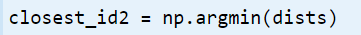

Otra optimización que podemos realizar es ignorar objetos en el segundo catálogo con una declinación lejana al objeto actualmente siendo emparejado en el primer catálogo. La forma más sencilla de hacer esto es:

1. Recorrer los objetos del segundo catálogo en orden de declinación, en lugar de en orden de ID.
2. Detenerse cuando la declinación del objeto del segundo catálogo supere la declinación objetivo por el radio máximo.

Entonces, por ejemplo, supongamos que tenemos un objeto del primer catálogo (el objetivo) con una declinación de δ y hemos establecido nuestro radio máximo de coincidencia en r. El nuevo algoritmo solo recorrerá los objetos del segundo catálogo con declinaciones entre -90 (el inicio) y δ + r grados antes de salir del bucle.

Si los objetos están distribuidos uniformemente, esto permite que el cruce de coincidencias evite los cálculos de distancia para aproximadamente la mitad de los objetos del segundo catálogo (en promedio).

¡Te mostraremos cómo reducir la declinación de inicio (-90) pronto!

Copia tu solución de coincidencia cruzada (crossmatch) de la microoptimización y modifícala para que ordene el catálogo 2 por declinación y salga temprano del bucle interno.

Tu función de coincidencia cruzada debería salir del bucle sobre el segundo catálogo cuando la declinación alcance dec1 + max_radius.

Los valores de retorno deben comportarse de la misma manera que la función original, dadas las mismas argumentos, excepto que el tiempo tomado (time_taken) debería ser notablemente menor para catálogos grandes.

Probaremos tu función con matrices de entrada aleatorias. Hemos incluido la función create_cat en el archivo inicial para generar matrices aleatorias para que puedas probar tu función por ti mismo.

¡Claro! Desglosemos esas líneas y la función para entenderlas más a fondo:

### Líneas: `order = np.argsort(cat2[:, 1])` y `cat2_ordered = cat2[order]`

1. **`order = np.argsort(cat2[:, 1])`:**
    - `np.argsort` es una función de NumPy que devuelve los índices que ordenarían un array.
    - `cat2[:, 1]` extrae la columna de declinación del catálogo 2.
    - `order` guarda los índices que ordenarían la columna de declinación de `cat2`.
    - En resumen, `order` es una lista de índices que indica cómo ordenar `cat2` por declinación.

2. **`cat2_ordered = cat2[order]`:**
    - `cat2_ordered` es una nueva versión de `cat2` que está ordenada por declinación.
    - Utiliza los índices en `order` para reorganizar las filas de `cat2` según el orden ascendente de declinación.
    - Ahora, `cat2_ordered` contiene los mismos objetos que `cat2`, pero ordenados de menor a mayor por declinación.

### Función: Bucle Principal

```python
for id1, (ra1, dec1) in enumerate(cat1):
    min_dist = np.inf
    min_id2 = None
    max_dec = dec1 + max_radius
    for id2, (ra2, dec2) in enumerate(cat2_ordered):
        if dec2 > max_dec:
            break

        dist = angular_dist(ra1, dec1, ra2, dec2)
        if dist < min_dist:
            min_id2 = order[id2]
            min_dist = dist

    # Ignore match if it's outside the maximum radius
    if min_dist > max_radius:
        no_matches.append(id1)
    else:
        matches.append((id1, min_id2, np.degrees(min_dist)))
```

1. **`for id1, (ra1, dec1) in enumerate(cat1):`**
    - Itera sobre cada objeto en el catálogo 1 (`cat1`).
    - `id1` es el índice del objeto actual.
    - `(ra1, dec1)` son las coordenadas del objeto actual.

2. **Inicialización de Variables:**
    - `min_dist` se establece inicialmente en infinito para rastrear la distancia mínima encontrada durante la iteración.
    - `min_id2` se establece en `None` para rastrear el índice del objeto en el catálogo 2 que tiene la distancia mínima.
    - `max_dec` se establece como la declinación máxima permitida para coincidencias.

3. **Bucle Interno:**
    - `for id2, (ra2, dec2) in enumerate(cat2_ordered):`
        - Itera sobre los objetos en el catálogo 2, ordenados por declinación.
        - `id2` es el índice del objeto actual en el catálogo 2.
        - `(ra2, dec2)` son las coordenadas del objeto actual en el catálogo 2.

    - `if dec2 > max_dec:`
        - Si la declinación del objeto en el catálogo 2 supera `max_dec`, sale del bucle. Esto es posible porque el catálogo 2 está ordenado por declinación, por lo que no tiene sentido seguir buscando si ya superamos la declinación máxima.

    - Cálculo de Distancia y Actualización:
        - `dist = angular_dist(ra1, dec1, ra2, dec2)`
            - Calcula la distancia angular entre el objeto actual en el catálogo 1 y el objeto actual en el catálogo 2.

        - Actualización de `min_dist` y `min_id2`:
            - Si `dist` es menor que `min_dist`, actualiza `min_dist` y guarda el índice (`order[id2]`) del objeto actual en `min_id2`.

4. **Verificación y Registro:**
    - Después del bucle interno, verifica si la distancia mínima (`min_dist`) está dentro del radio máximo permitido (`max_radius`).
    - Si es así, registra la coincidencia en `matches`; de lo contrario, registra que no hay coincidencia en `no_matches`.

En resumen, este bucle principal busca las coincidencias entre el catálogo 1 y el catálogo 2, utilizando la optimización de que el catálogo 2 está ordenado por declinación, lo que permite salir temprano del bucle interno cuando la declinación supera el límite establecido. Esto ayuda a reducir el tiempo de ejecución, especialmente para grandes conjuntos de datos.

import numpy as np
import time

def angular_dist(r1, d1, r2, d2):
    a = np.sin(np.abs(d1 - d2)/2)**2
    b = np.cos(d1)*np.cos(d2)*np.sin(np.abs(r1 - r2)/2)**2
    return 2*np.arcsin(np.sqrt(a + b))

def crossmatch(cat1, cat2, max_radius):
    start = time.perf_counter()
    max_radius = np.radians(max_radius)
    
    matches = []
    no_matches = []

    # Convert coordinates to radians
    cat1 = np.radians(cat1)
    cat2 = np.radians(cat2)
    order = np.argsort(cat2[:,1])
    cat2_ordered = cat2[order]
    
    for id1, (ra1, dec1) in enumerate(cat1):
        min_dist = np.inf
        min_id2 = None
        max_dec = dec1 + max_radius
        for id2, (ra2, dec2) in enumerate(cat2_ordered):
            if dec2 > max_dec:
                break
            
            dist = angular_dist(ra1, dec1, ra2, dec2)
            if dist < min_dist:
                min_id2 = order[id2]
                min_dist = dist
            
        # Ignore match if it's outside the maximum radius
        if min_dist > max_radius:
            no_matches.append(id1)
        else:
            matches.append((id1, min_id2, np.degrees(min_dist)))
        
    time_taken = time.perf_counter() - start
    return matches, no_matches, time_taken

Podemos mejorar aún más la optimización anterior no solo deteniendo la búsqueda una vez que supera la declinación del objeto a emparejar, sino también iniciando la búsqueda lo más cerca posible del objeto. En resumen, la modificación es la siguiente:

1. Ordenar los objetos del segundo catálogo por orden de declinación.
2. Iniciar el bucle de búsqueda en el primer objeto del segundo catálogo con declinación mayor que $\delta - r$.
3. Finalizar el bucle de búsqueda en el último objeto del segundo catálogo con declinación menor que $\delta + r$.
   
Limitar la búsqueda de esta manera ahorra en el cálculo de las distancias para casi todo el segundo catálogo.

Solo necesitamos encontrar una forma rápida de ubicar los objetos del segundo catálogo más cercanos a los límites de $[\delta - r, \delta + r]$ para saber dónde comenzar y terminar nuestra búsqueda.

La forma más fácil de hacer esto conceptualmente es recorrer el catálogo ordenado, verificando cada declinación hasta encontrar los objetos que buscamos. Pero hay una manera más eficiente.

Si una lista está ordenada, puede ser mucho más rápido encontrar el índice de algún elemento utilizando una búsqueda binaria en lugar de realizar comparaciones en cada elemento de la lista.

Una búsqueda binaria divide la lista a la mitad repetidamente, continuando la búsqueda en la mitad que puede contener el elemento objetivo.

Un ejemplo sería encontrar el valor 15 en la siguiente lista:

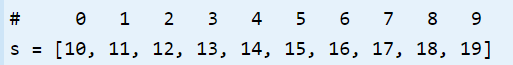

El punto medio (redondeando hacia abajo) de s es s[4], que es 14;

14 es menor que 15, por lo que 15 debe estar en s[5:10];

El punto medio de s[5:10] es s[7], que es 17;

17 es mayor que 15, por lo que 15 debe estar en algún lugar de s[5:7];

El punto medio de s_list[5:7] es s[5], que es 15;

15 es el elemento que estamos buscando, por lo que su índice es 5.

Esto parece una manera indirecta de encontrar 15 en una lista del 10 al 19, pero ten en cuenta que solo se realizaron 3 comparaciones, mientras que se habrían realizado 6 comparaciones si hubiéramos buscado en toda la lista.

NumPy proporciona una búsqueda binaria con la función searchsorted.

En lugar de buscar un elemento específico, searchsorted encuentra la posición de inserción del objetivo (en realidad, el índice después) que mantendría el orden ordenado. Utilizando el ejemplo anterior, podemos encontrar el elemento justo después del número 14.5:

In [59]:
#     0   1   2   3   4   5   6   7   8   9
s = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

index = np.searchsorted(s, 15, side = 'left')
print(index)

5


Si lo cambias a side='right', obtendrás la última posición donde 15 puede ser ordenado para mantener el orden.

Copia el código de la función "crossmatch" desde el bloque correspondiente y modifícalo para recorrer solo los objetos en el segundo catálogo con declinaciones entre `dec1 - max_radius` y `dec1 + max_radius`, utilizando la búsqueda binaria.

Tu función "crossmatch" debería utilizar `np.searchsorted` para encontrar el punto de inicio (justo antes de `dec1 - max_radius`) y luego salir del bucle cuando la declinación alcance `dec1 + max_radius`.

Los valores de retorno deben comportarse de la misma manera que la función original, dados los mismos argumentos, excepto que el tiempo de ejecución (`time_taken`) debería ser notablemente menor para catálogos grandes.

Probaremos tu función con arreglos de entrada aleatorios. Hemos incluido la función `create_cat` en el archivo de inicio para generar arreglos aleatorios, para que puedas probar tu función por ti mismo.

In [1]:
import numpy as np
import time

def crossmatch_updated(cat1, cat2, max_radius):
    
    start = time.perf_counter()
    max_radius = np.radians(max_radius)
  
    matches = []
    no_matches = []

    # Convert coordinates to radians
    cat1 = np.radians(cat1)
    cat2 = np.radians(cat2)

    # Sort cat2 by declination
    order = np.argsort(cat2[:, 1])
    cat2_ordered = cat2[order]
    
    for id1, (ra1, dec1) in enumerate(cat1):
        
        # Find the starting point using binary search
        start_idx = np.searchsorted(cat2_ordered[:, 1], dec1 - max_radius, side='left')
        end_dec = dec1 + max_radius
        
        for id2 in range(start_idx, len(cat2_ordered)):
            ra2, dec2 = cat2_ordered[id2]

            if dec2 > end_dec:
                break
            
            dist = angular_dist(ra1, dec1, ra2, dec2)

            if dist < min_dist:
                min_id2 = order[id2]
                min_dist = dist

        # Ignore match if it's outside the maximum radius
        if min_dist > max_radius:
            no_matches.append(id1)
        else:
            matches.append((id1, min_id2, np.degrees(min_dist)))

    time_taken = time.perf_counter() - start
    return matches, no_matches, time_taken


In [60]:


def crossmatch_box(coords1, coords2):
    start_time = time()
    deg2rad = np.pi/180
    rad2deg = 180/np.pi
    max_radius = 5*deg2rad
    matches = []
    no_matches = []
    
    # Convert coordinates to radians
    coords1 = coords1*deg2rad
    coords2 = coords2*deg2rad
    
    # Find ascending declination order of second catalogue
    asc_dec = np.argsort(coords2[:, 1])
    coords2_sorted = coords2[asc_dec]
    dec2_sorted = coords2_sorted[:, 1]
    
    for id1, (ra1, dec1) in enumerate(coords1):
        closest_dist = np.inf
        closest_id2 = None
        
        # Declination search box
        min_dec = dec1 - max_radius
        max_dec = dec1 + max_radius
        
        # Start and end indices of the search
        start = dec2_sorted.searchsorted(min_dec, side='left')
        end = dec2_sorted.searchsorted(max_dec, side='right')
        
        for s_id2, (ra2, dec2) in enumerate(coords2_sorted[start:end+1], start):
            dist = angular_dist_rad(ra1, dec1, ra2, dec2)
            if dist < closest_dist:
                closest_sorted_id2 = s_id2
                closest_dist = dist
        
        # Ignore match if it's outside the maximum radius
        if closest_dist > max_radius:
            no_matches.append(id1)
        else:
            closest_id2 = asc_dec[closest_sorted_id2]
            matches.append([id1, closest_id2, closest_dist*rad2deg])
    
    time_taken = time() - start_time
    return matches, no_matches, time_taken

### Árboles k-dimensionales

La coincidencia cruzada es una tarea muy común en astrofísica, por lo que es natural que ya se hayan escrito implementaciones optimizadas. Una implementación popular en Python se encuentra en el módulo Astropy y utiliza objetos llamados árboles k-d para realizar coincidencias cruzadas increíblemente rápido.

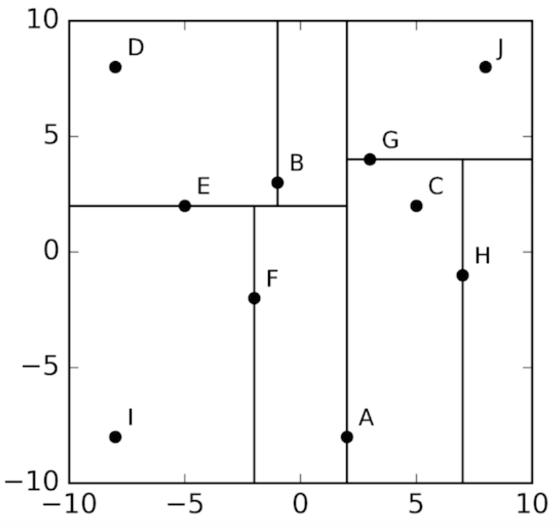

Astropy construye un árbol k-d a partir del segundo catálogo, permitiéndole buscar eficientemente coincidencias para cada objeto en el primer catálogo. La construcción de un árbol k-d es similar a la búsqueda binaria que viste anteriormente. El espacio k-dimensional se divide recursivamente en dos partes hasta que cada división contiene solo un objeto. Crear un árbol k-d a partir de un catálogo astronómico funciona de la siguiente manera:

1. Encuentra el objeto con la ascensión recta mediana, divide el catálogo en objetos de las particiones izquierda y derecha de este.
2. Encuentra los objetos con la declinación mediana en cada partición, divide las particiones en particiones más pequeñas de objetos hacia abajo y hacia arriba de estos.
3. Encuentra los objetos con la ascensión recta mediana en cada una de las particiones, divide las particiones en particiones más pequeñas de objetos a la izquierda y a la derecha de estos.
4. Repite los pasos 2-3 hasta que cada partición contenga solo un objeto.

Esto crea un árbol binario donde cada objeto utilizado para dividir una partición (un nodo) se vincula a los dos objetos que luego dividen las particiones que ha creado (sus hijos).

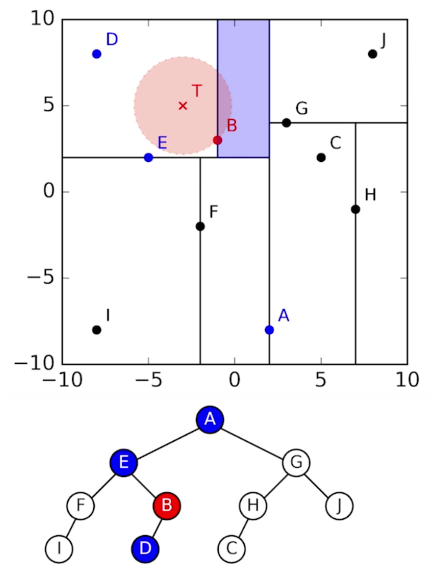

Una vez que hayas creado un árbol k-d a partir de un catálogo, encontrar una coincidencia con un objeto funciona de la siguiente manera:

1. Calcula la distancia desde el objeto hasta el nodo de nivel más alto (el nodo raíz), luego ve al nodo hijo más cercano (en ascensión recta) al objeto.
2. Calcula la distancia desde el objeto hasta este hijo, luego ve al nodo hijo más cercano (en declinación) al objeto.
3. Calcula la distancia desde el objeto hasta este hijo, luego ve al nodo hijo más cercano (en ascensión recta) al objeto.
4. Repite los pasos 2-3 hasta que llegues a un nodo hijo sin más hijos (un nodo hoja).
5. Encuentra la distancia más corta de todas las distancias calculadas, esto corresponde al objeto más cercano.

Dado que cada nodo se ramifica en dos hijos, un catálogo de N objetos tendrá, en promedio, log2(N) nodos desde la raíz hasta cualquier hoja. Entonces, aunque parece requerir mucho esfuerzo crear un árbol k-d, hacerlo te permite, por ejemplo, buscar todo el catálogo de SuperCOSMOS de 250 millones de objetos usando solo 28 cálculos de distancia.

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [4]:
coords1 = [[270, -30], [185, 15]]
coords2 = [[185, 20], [280, -30]]
sky_cat1 = SkyCoord(coords1*u.degree, frame='icrs')
sky_cat2 = SkyCoord(coords2*u.degree, frame='icrs')
closest_ids, closest_dists, closest_dists3d = sky_cat1.match_to_catalog_sky(sky_cat2)
print(closest_ids)
print(closest_dists) 

[1 0]
[8d39m27.00009472s 5d00m00s]


¡Claro! Vamos a desglosar el código para entenderlo paso a paso:

1. **Importación de Módulos:**
   ```python
   from astropy.coordinates import SkyCoord
   from astropy import units as u
   ```
   Aquí, estamos importando las clases y funciones necesarias de la biblioteca Astropy. Astropy es una biblioteca de Python diseñada para trabajar con datos astronómicos.

2. **Definición de Coordenadas:**
   ```python
   coords1 = [[270, -30], [185, 15]]
   coords2 = [[185, 20], [280, -30]]
   ```
   Definimos dos conjuntos de coordenadas en grados. Cada conjunto tiene dos pares de coordenadas [longitud, latitud]. Estas coordenadas representan ubicaciones en el cielo.

3. **Creación de Objetos SkyCoord:**
   ```python
   sky_cat1 = SkyCoord(coords1*u.degree, frame='icrs')
   sky_cat2 = SkyCoord(coords2*u.degree, frame='icrs')
   ```
   Creamos objetos `SkyCoord` utilizando las coordenadas que definimos previamente. Multiplicamos por `u.degree` para indicar que las coordenadas están en grados y especificamos el sistema de referencia como ICRS (International Celestial Reference System).

4. **Búsqueda de Coincidencias Más Cercanas:**
   ```python
   closest_ids, closest_dists, closest_dists3d = sky_cat1.match_to_catalog_sky(sky_cat2)
   ```
   Utilizamos el método `match_to_catalog_sky` para encontrar las coincidencias más cercanas entre los dos conjuntos de coordenadas. Este método devuelve los índices de las coincidencias más cercanas en el segundo catálogo, así como las distancias angulares y 3D correspondientes.

5. **Impresión de Resultados:**
   ```python
   print(closest_ids)
   print(closest_dists)
   ```
   Imprimimos los resultados en la consola. `closest_ids` contiene los índices de las coincidencias más cercanas en el segundo catálogo, y `closest_dists` contiene las distancias angulares correspondientes.

Entonces, en resumen, el código encuentra las coincidencias más cercanas entre dos conjuntos de coordenadas astronómicas y muestra los índices y las distancias angulares de esas coincidencias. Este tipo de operaciones es útil en astronomía cuando se quiere comparar y asociar objetos celestes en diferentes catálogos.

Los objetos SkyCoord son objetos de almacenamiento y manipulación de catálogos astronómicos de propósito general en Astropy. Aceptan cualquier cosa que se parezca a un conjunto de coordenadas, siempre y cuando especifiques las unidades (aquí especificamos grados con u.degree) y un marco de referencia (ICRS es esencialmente lo mismo que las coordenadas ecuatoriales). Los resultados, closest_id y closest_dists, proporcionan el índice de fila del objeto coincidente en sky_cat2 y la distancia hasta él. closest_dists es la distancia angular, mientras que closest_dists3d es la distancia tridimensional, que no nos preocupa en este caso.

Nota: Astropy devuelve distancias como objetos Quantity. Puedes convertirlos a matrices NumPy accediendo a su atributo de valor de la siguiente manera:

```python
closest_dists_array = closest_dists.value
```

#### Implementación en python
Este código realiza una operación llamada "crossmatching" entre dos conjuntos de coordenadas astronómicas. El objetivo es encontrar coincidencias cercanas entre los dos conjuntos de coordenadas y almacenar información sobre las coincidencias y aquellas que no cumplen con ciertos criterios. Aquí está una explicación detallada:

1. **Importación de Módulos:**
   ```python
   def crossmatch_tree(coords1, coords2):
   ```
   Definición de una función llamada `crossmatch_tree` que toma dos conjuntos de coordenadas como entrada.

2. **Inicialización de Variables:**
   ```python
   start_time = time()
   max_radius = 5
   matches = []
   no_matches = []
   ```
   Se establece el tiempo de inicio y se inicializan otras variables. `max_radius` es la distancia máxima para considerar dos objetos como coincidencia. `matches` almacenará las coincidencias encontradas, y `no_matches` almacenará las coordenadas que no tienen coincidencias dentro de la distancia especificada.

3. **Creación de Objetos SkyCoord:**
   ```python
   coords1_sc = SkyCoord(coords1*u.degree, frame='icrs')
   coords2_sc = SkyCoord(coords2*u.degree, frame='icrs')
   ```
   Se crean objetos `SkyCoord` para representar las coordenadas en el sistema de referencia ICRS.

4. **Realización del Crossmatching:**
   ```python
   closest_ids, closest_dists, _ = coords1_sc.match_to_catalog_sky(coords2_sc)
   ```
   Se realiza el crossmatching utilizando el método `match_to_catalog_sky`. `closest_ids` contiene los índices de las coincidencias más cercanas en `coords2_sc`, y `closest_dists` contiene las distancias angulares correspondientes. El tercer valor retornado (ignorado aquí con `_`) sería la distancia tridimensional, pero no se utiliza.

5. **Iteración sobre las Coincidencias:**
   ```python
   for id1, (closest_id2, dist) in enumerate(zip(closest_ids, closest_dists)):
   ```
   Se itera sobre los índices y las distancias de las coincidencias más cercanas.

6. **Verificación de Distancia:**
   ```python
   closest_dist = dist.value
   ```
   Se extrae el valor numérico de la distancia angular.

7. **Condición de Coincidencia:**
   ```python
   if closest_dist > max_radius:
       no_matches.append(id1)
   else:
       matches.append([id1, closest_id2, closest_dist])
   ```
   Se verifica si la distancia supera el límite establecido (`max_radius`). Si es así, se agrega el índice `id1` a la lista de `no_matches`. De lo contrario, se agrega una lista `[id1, closest_id2, closest_dist]` a la lista de `matches`.

8. **Cálculo del Tiempo Transcurrido:**
   ```python
   time_taken = time() - start_time
   ```
   Se calcula el tiempo transcurrido desde el inicio hasta este punto.

9. **Retorno de Resultados:**
   ```python
   return matches, no_matches, time_taken
   ```
   La función devuelve las coincidencias encontradas, las coordenadas sin coincidencias y el tiempo total de ejecución.